Enter integer (>2): 4
[[ 1 -1 -1 -1]
 [ 1 -1  1 -1]
 [ 1 -1 -1  1]
 [ 1 -1  1 -1]]


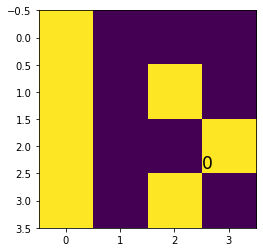

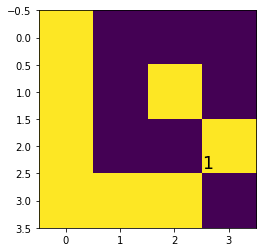

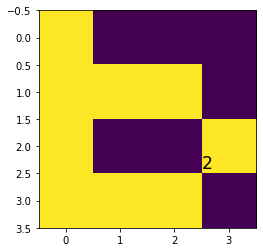

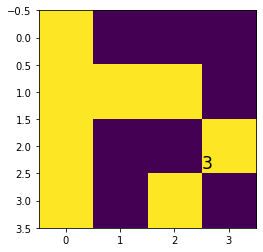

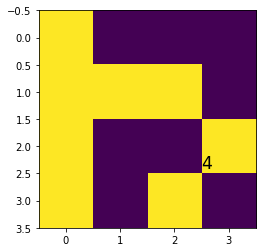

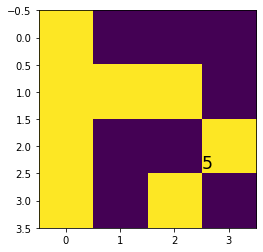

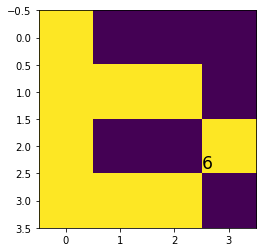

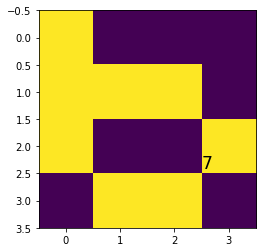

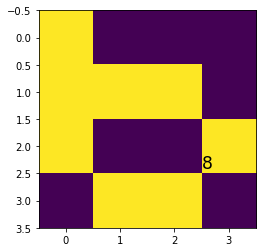

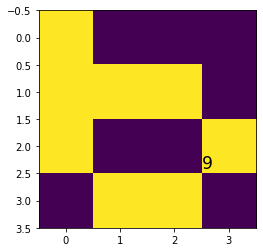

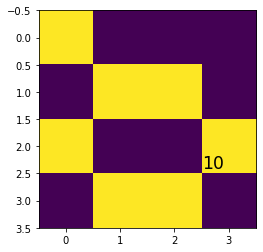

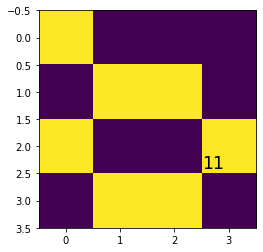

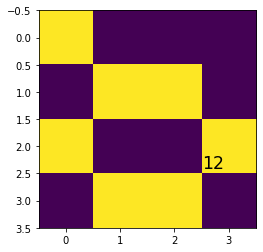

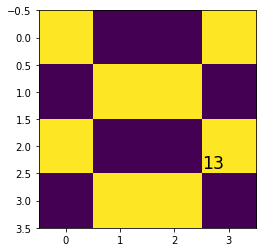

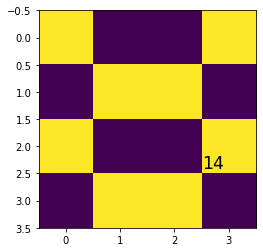

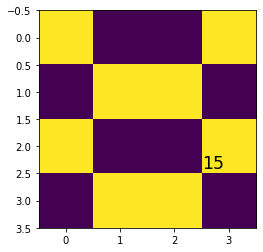

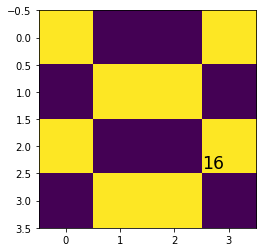

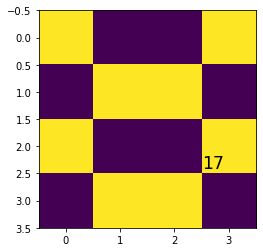

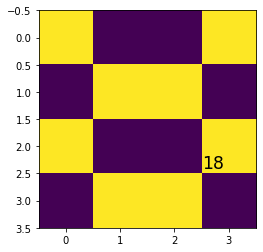

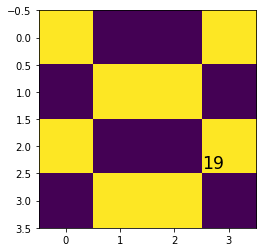

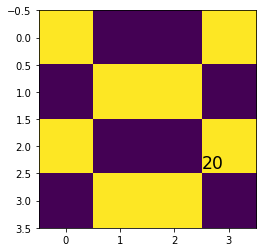

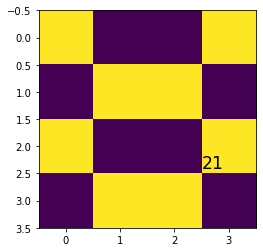

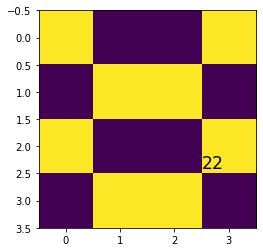

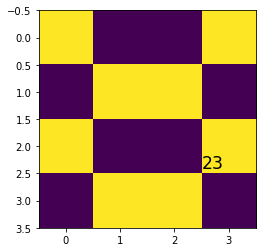

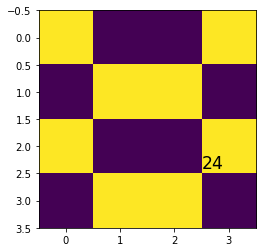

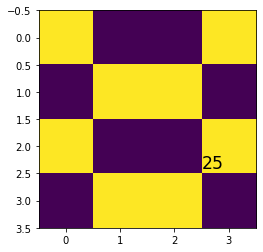

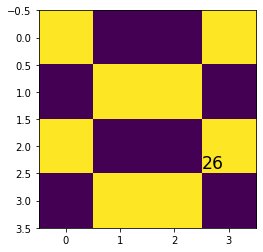

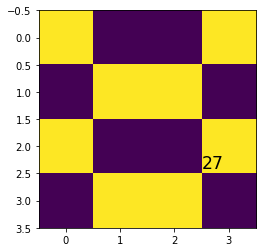

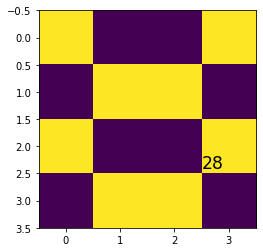

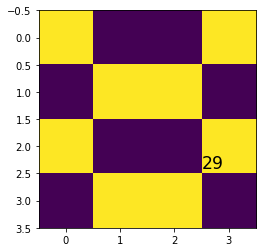

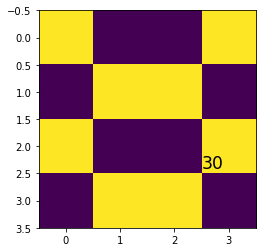

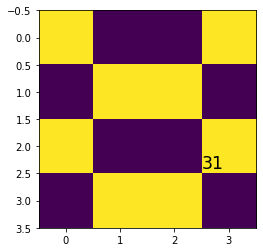

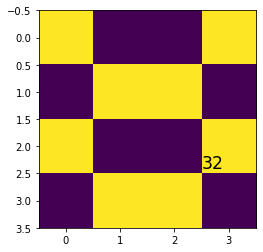

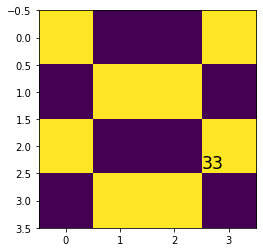

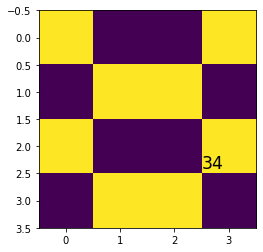

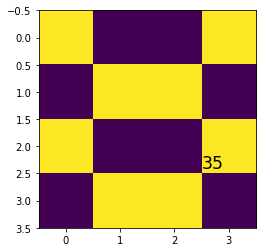

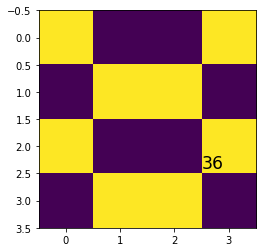

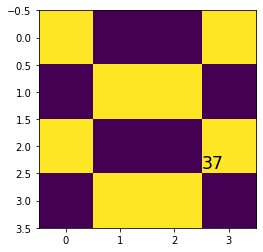

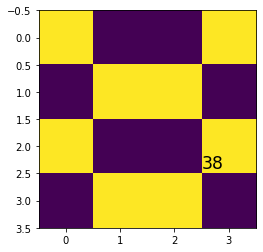

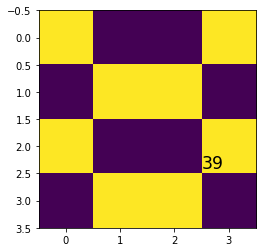

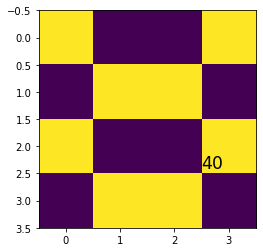

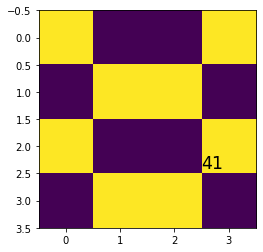

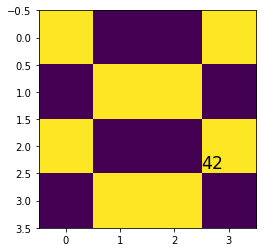

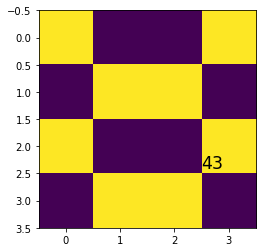

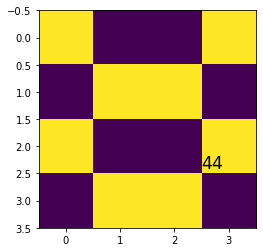

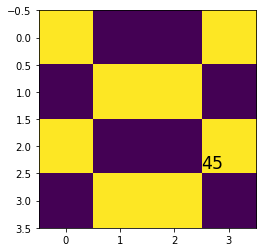

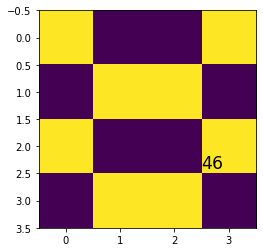

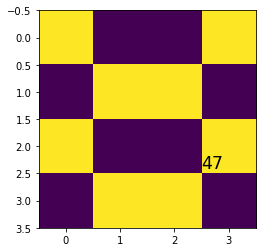

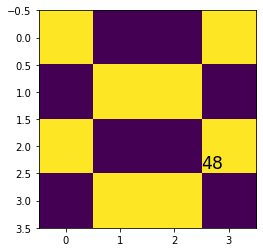

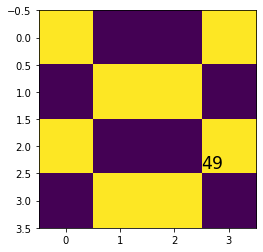

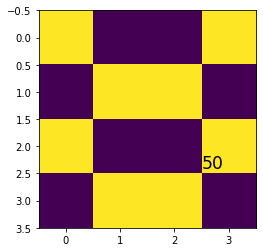

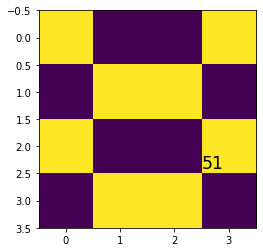

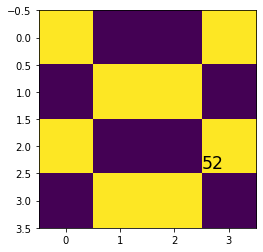

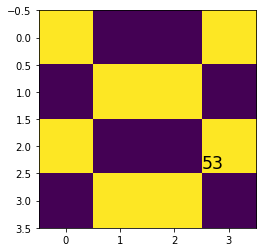

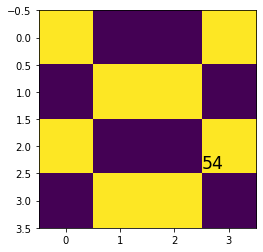

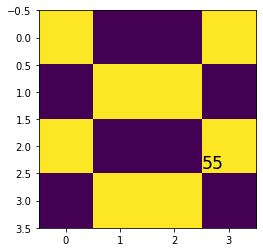

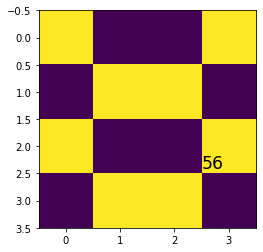

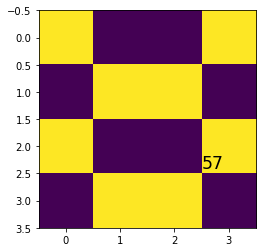

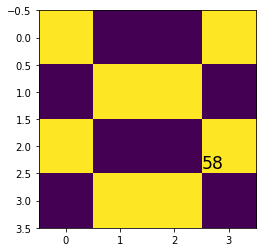

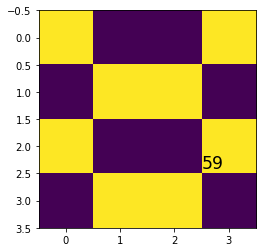

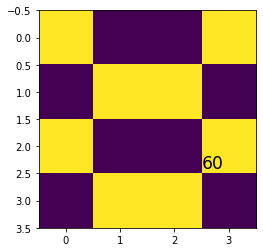

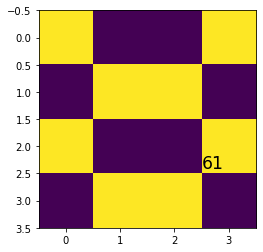

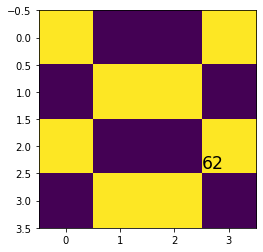

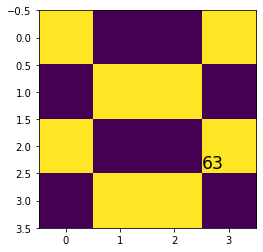

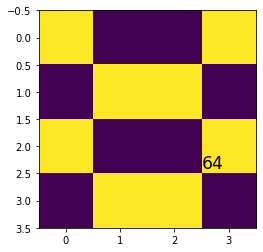

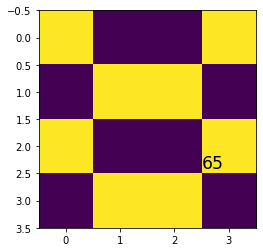

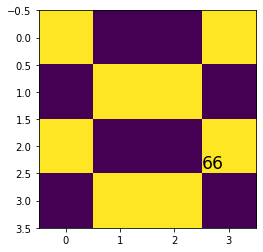

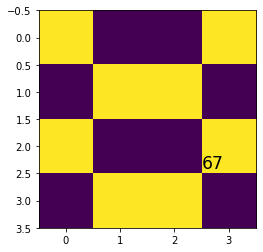

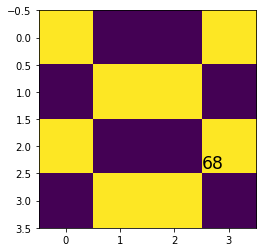

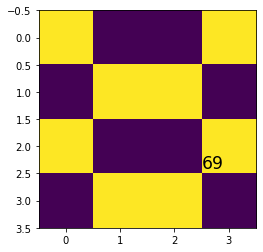

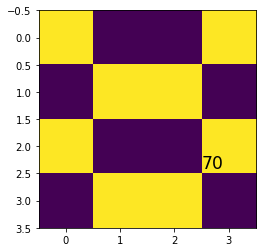

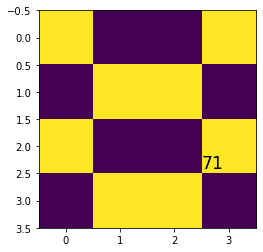

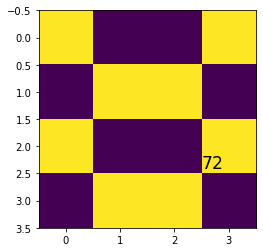

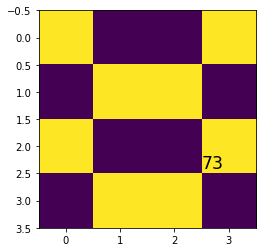

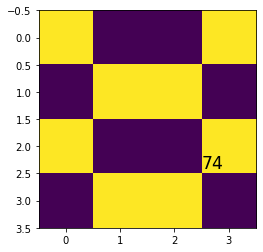

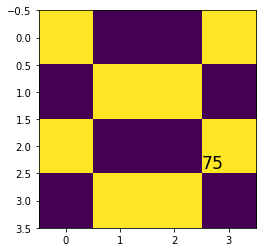

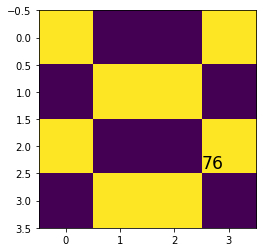

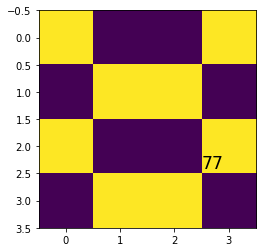

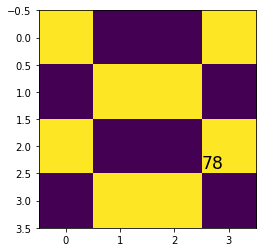

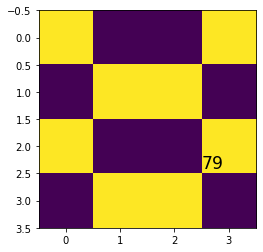

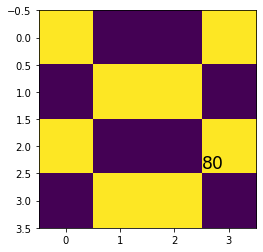

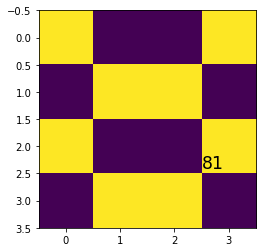

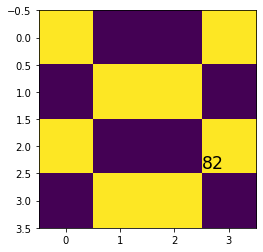

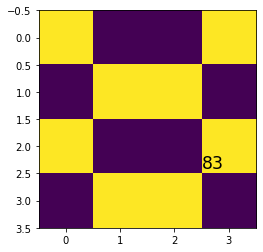

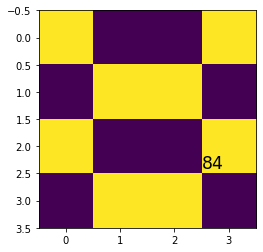

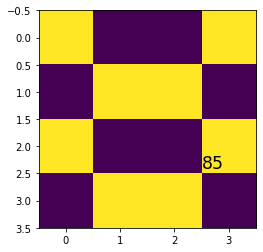

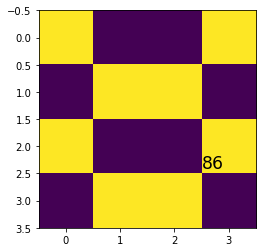

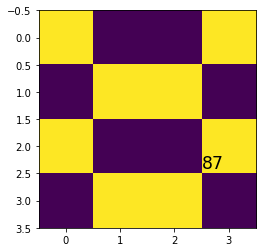

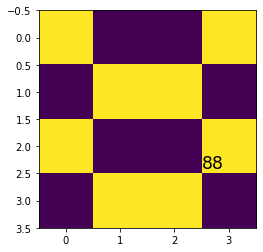

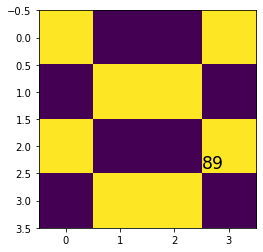

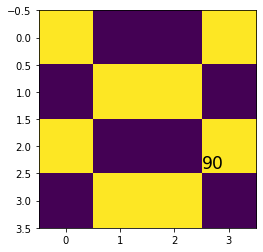

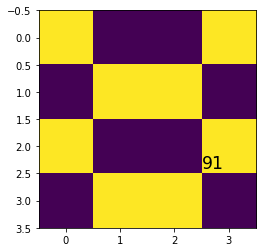

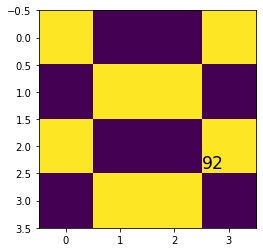

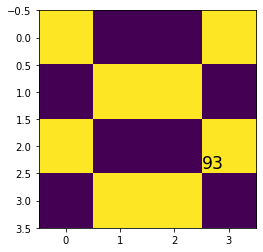

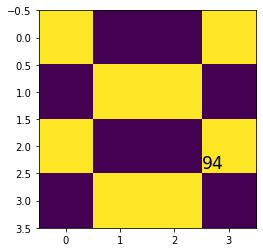

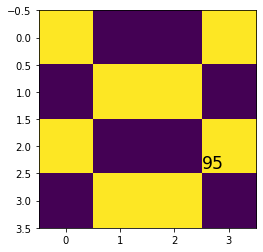

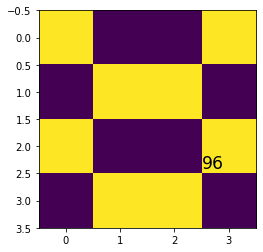

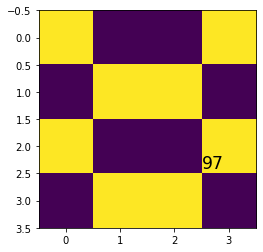

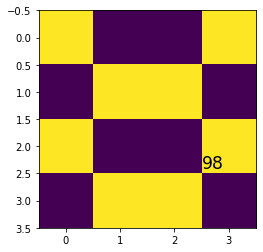

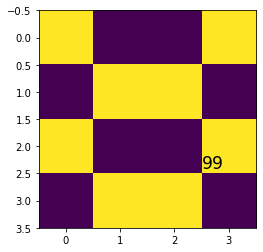

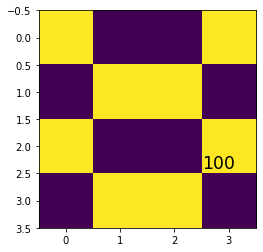

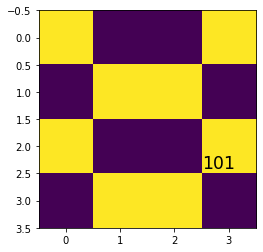

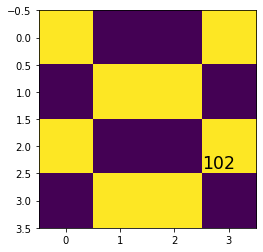

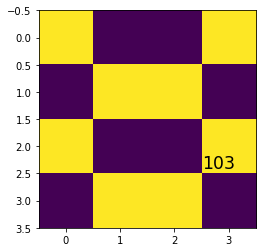

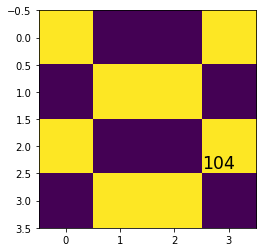

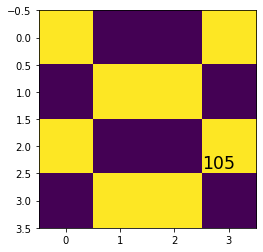

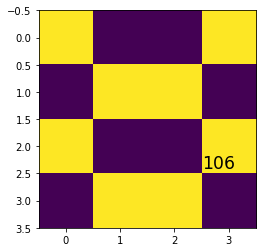

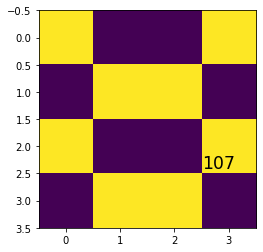

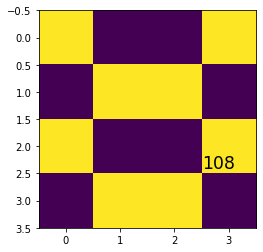

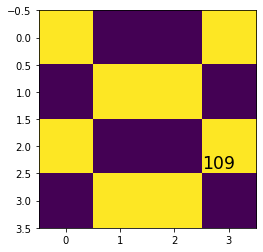

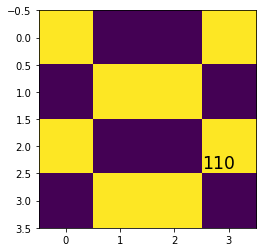

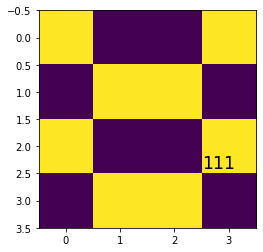

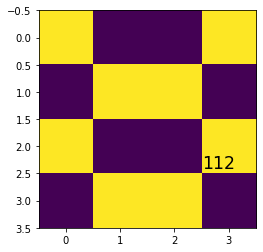

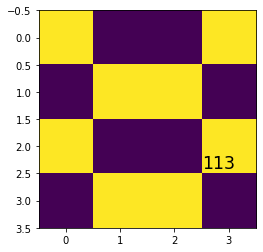

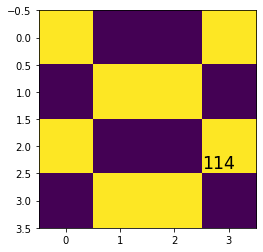

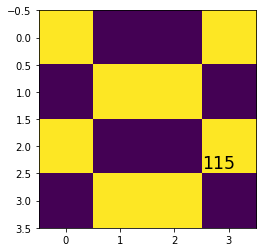

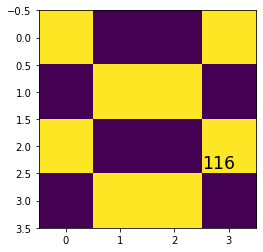

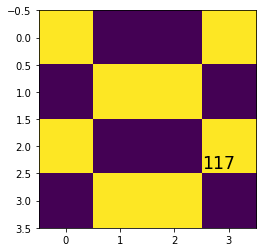

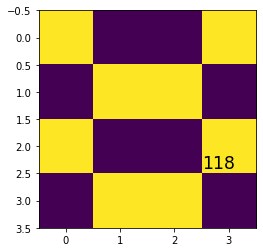

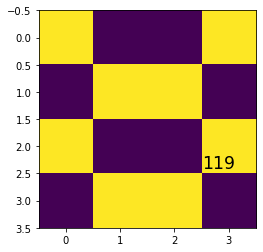

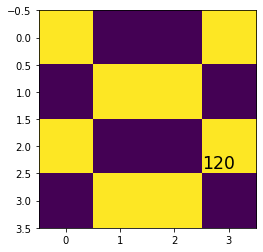

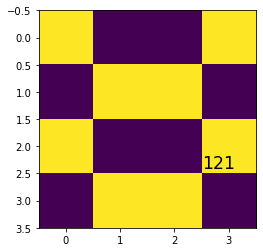

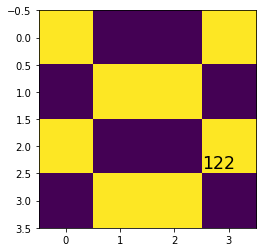

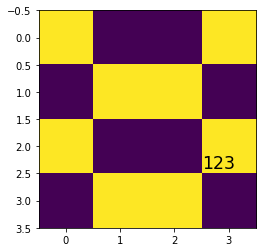

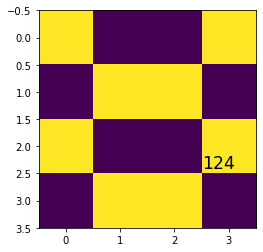

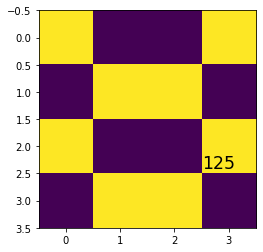

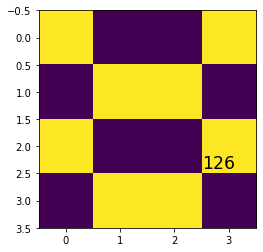

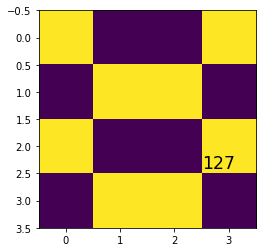

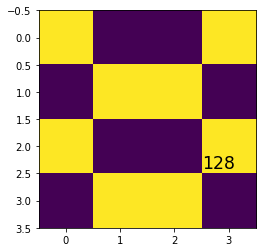

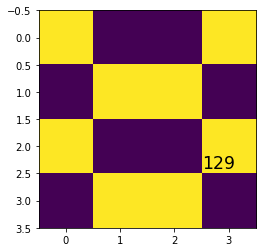

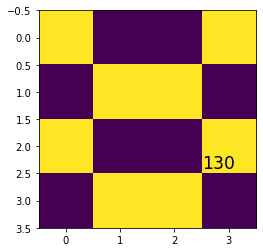

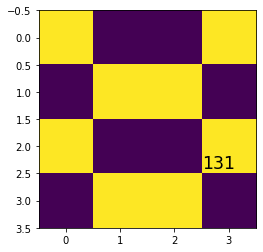

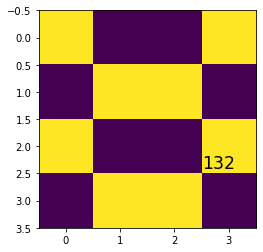

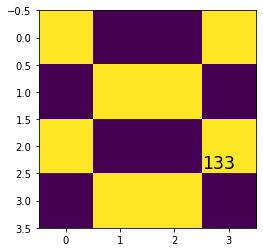

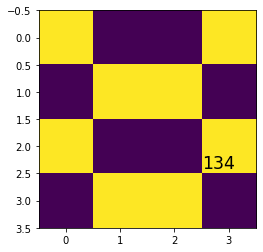

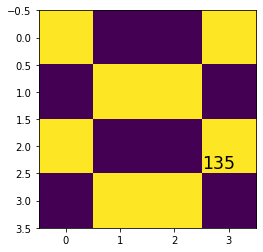

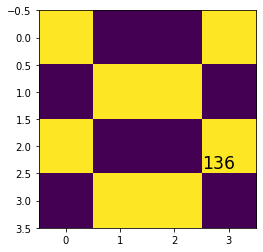

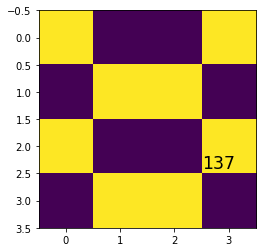

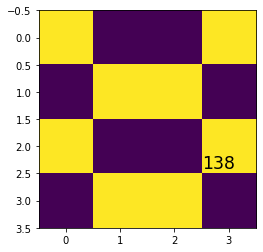

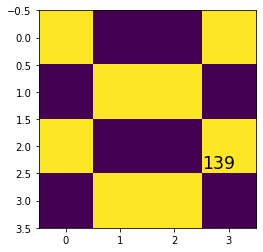

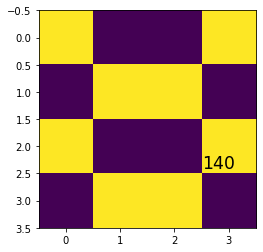

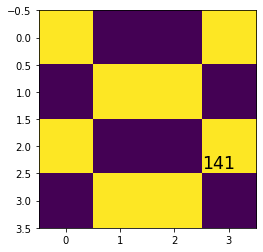

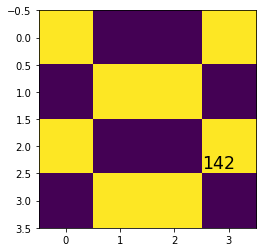

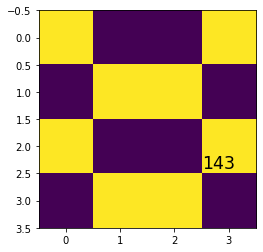

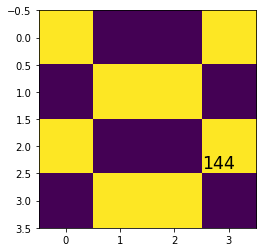

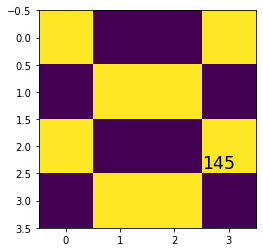

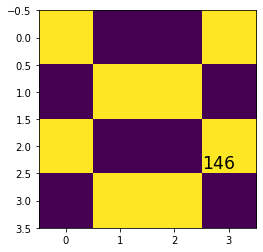

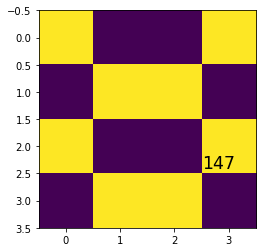

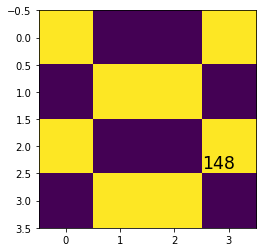

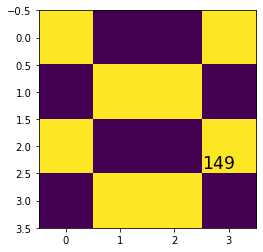

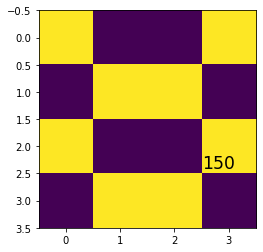

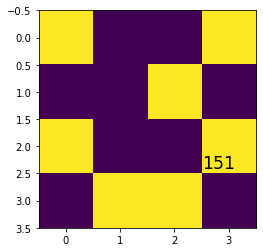

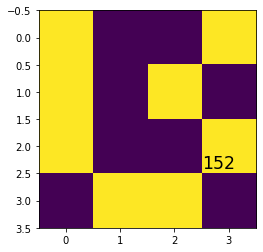

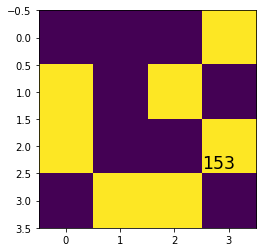

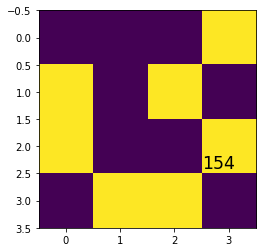

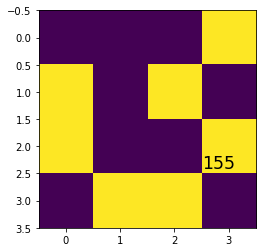

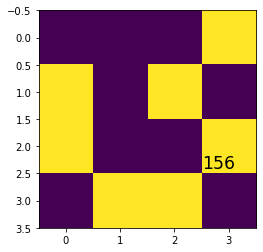

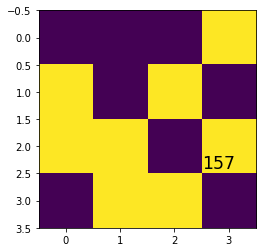

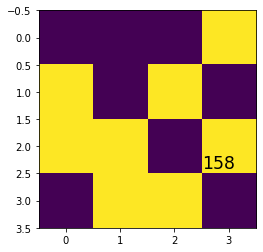

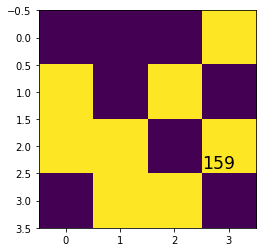

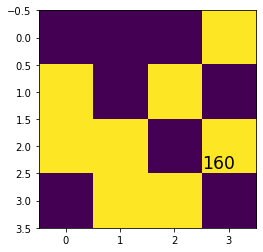

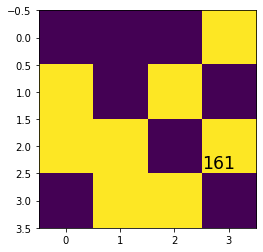

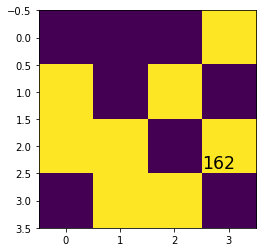

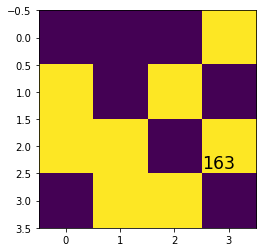

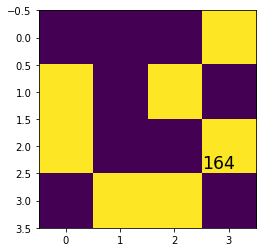

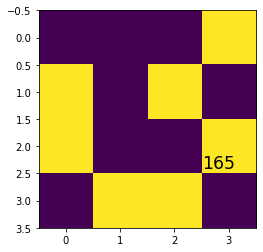

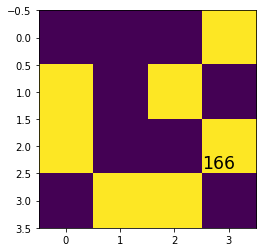

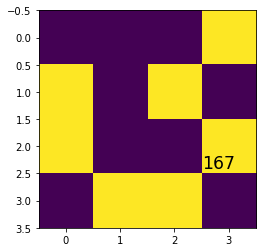

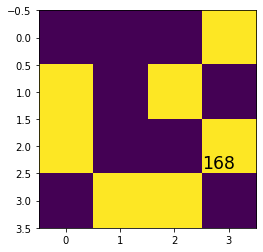

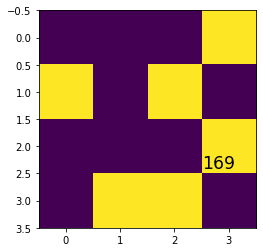

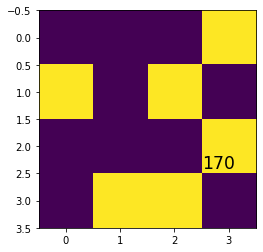

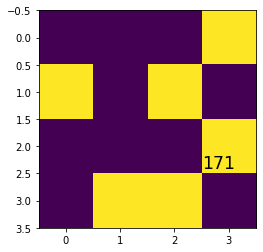

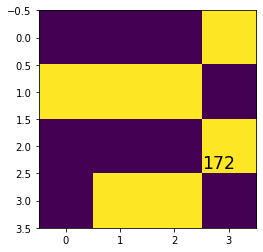

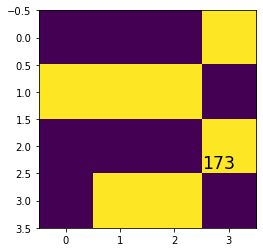

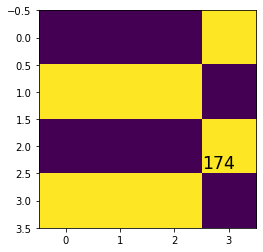

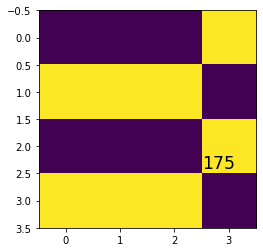

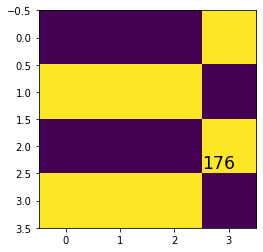

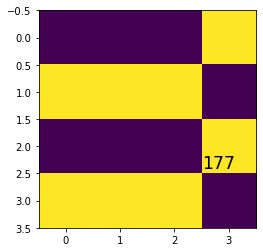

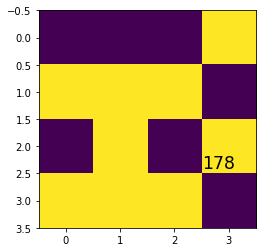

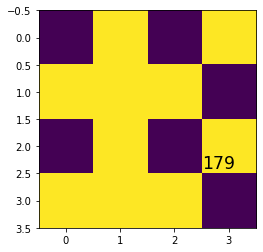

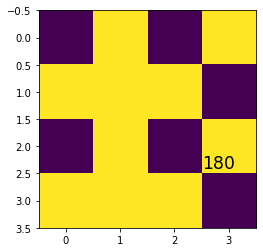

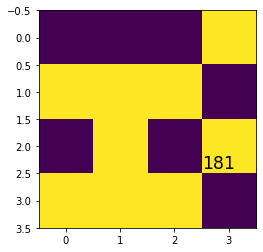

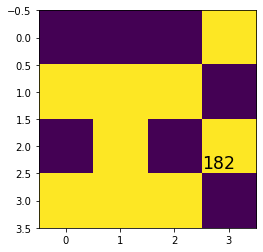

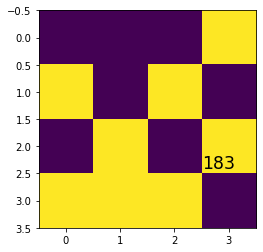

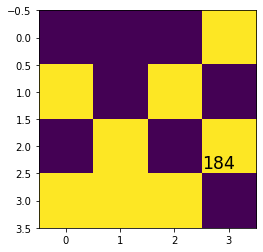

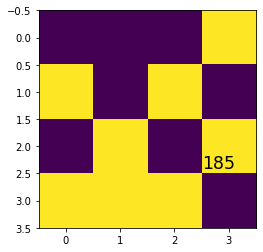

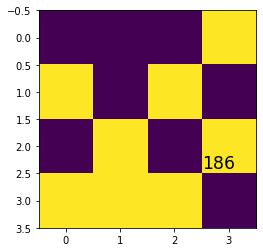

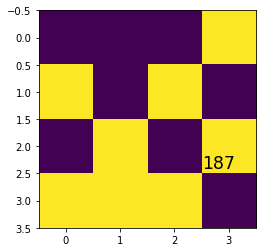

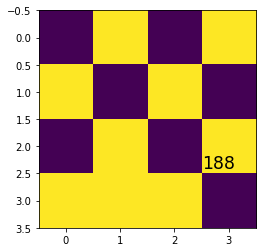

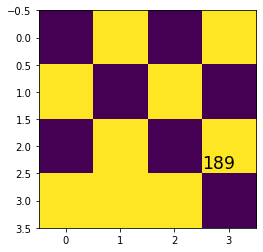

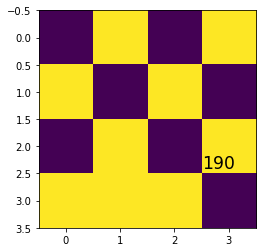

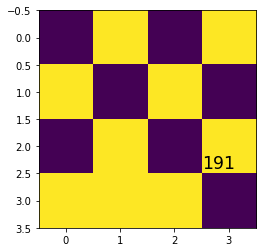

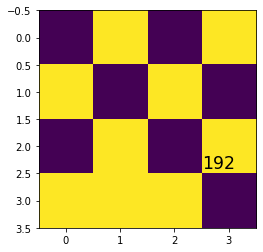

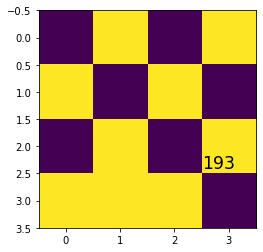

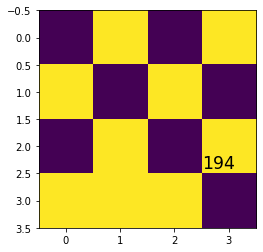

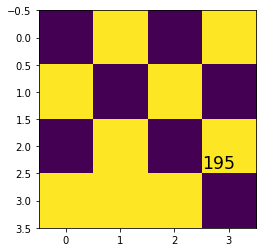

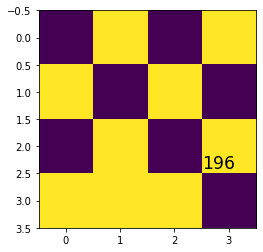

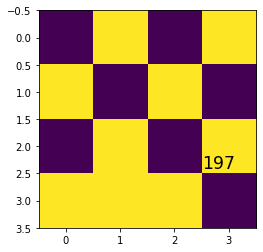

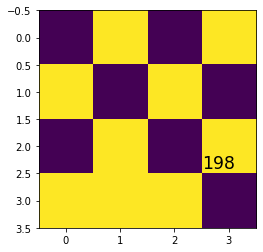

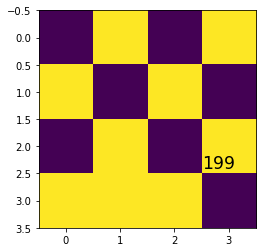

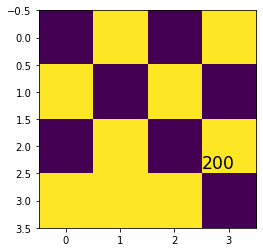

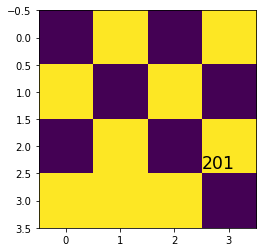

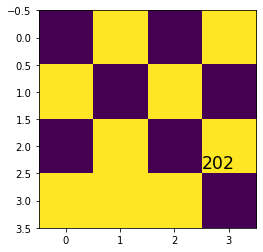

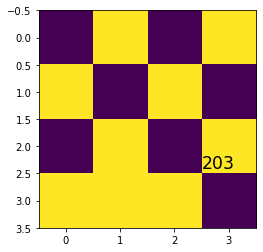

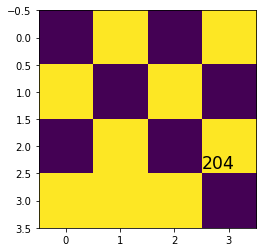

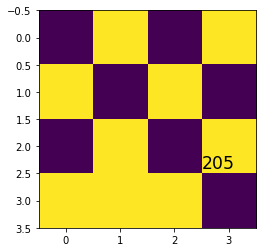

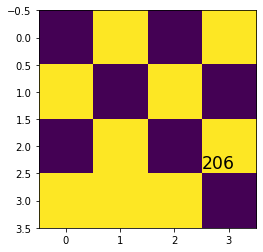

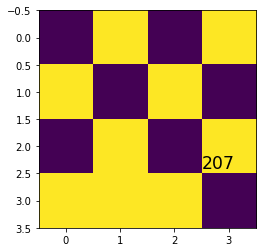

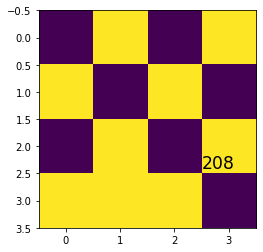

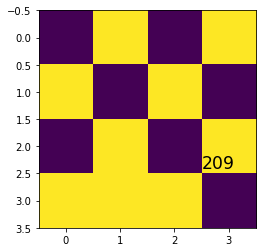

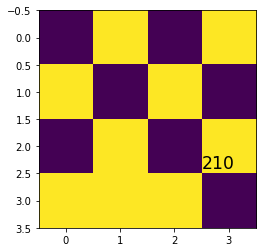

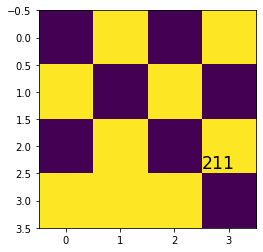

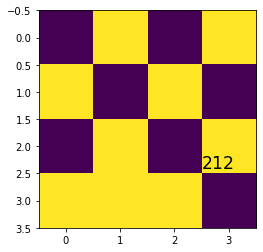

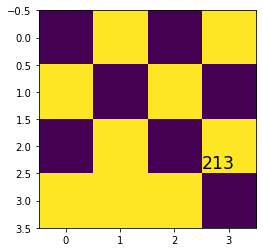

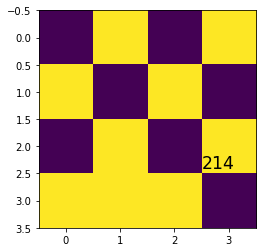

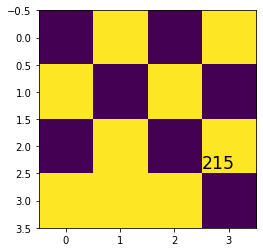

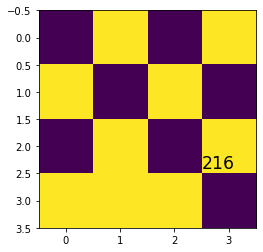

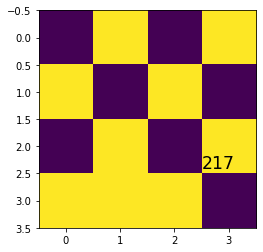

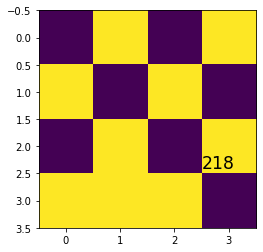

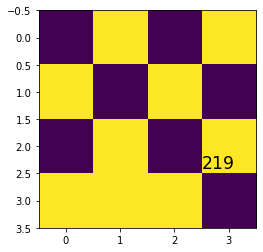

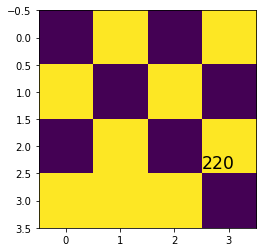

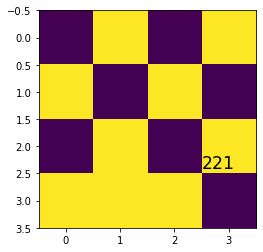

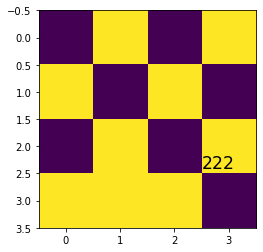

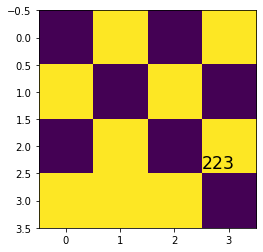

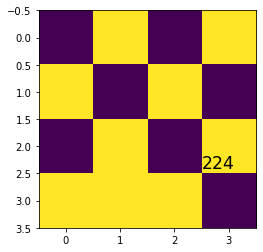

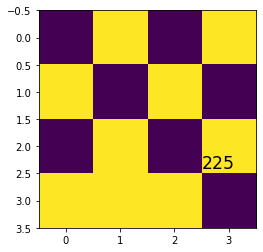

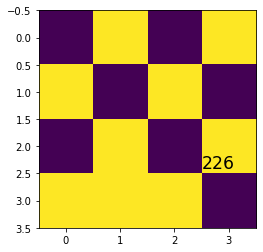

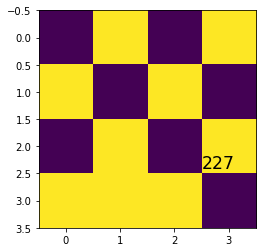

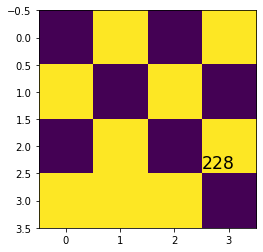

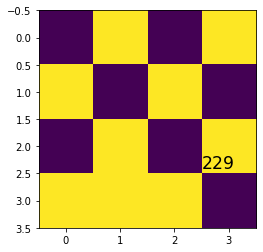

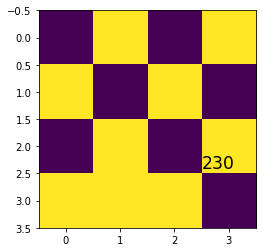

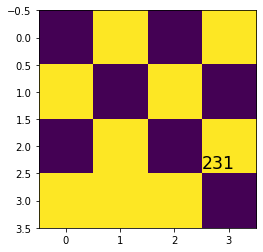

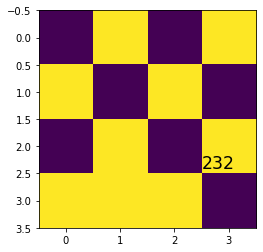

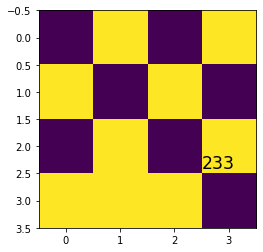

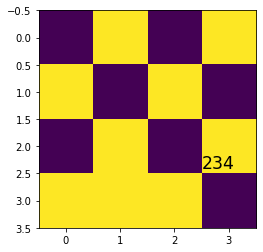

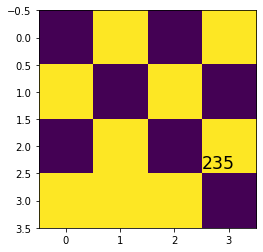

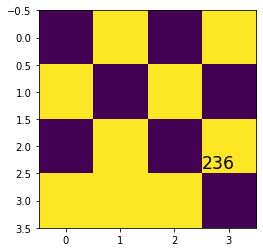

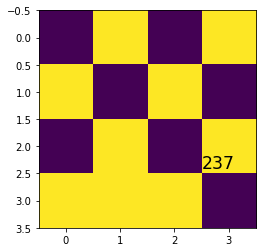

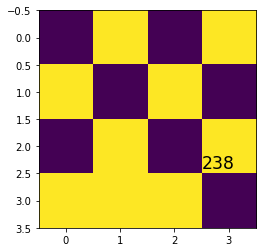

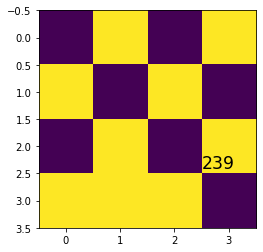

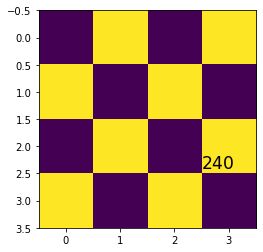

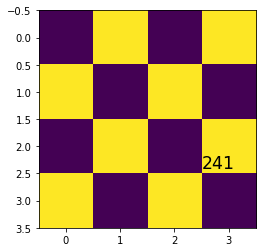

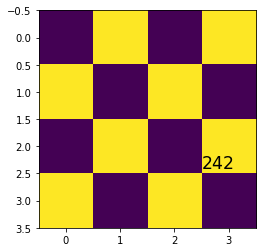

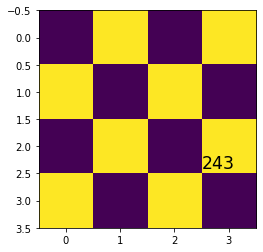

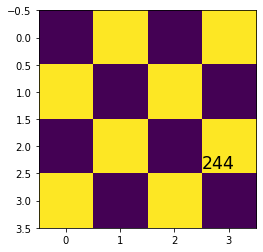

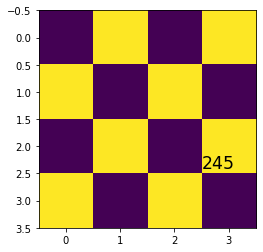

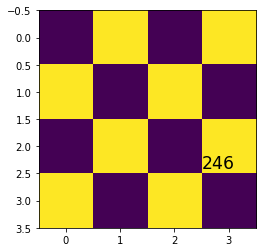

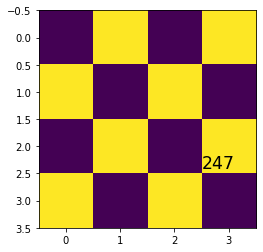

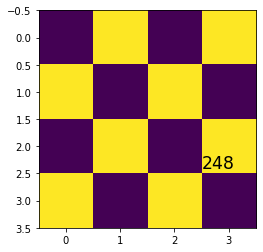

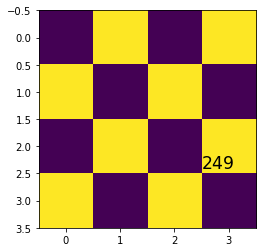

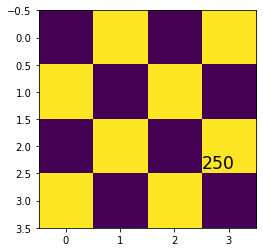

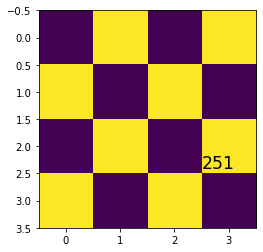

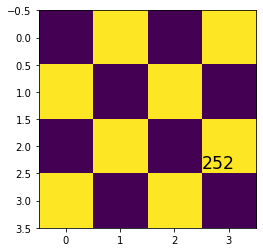

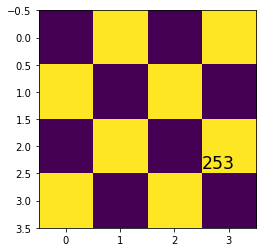

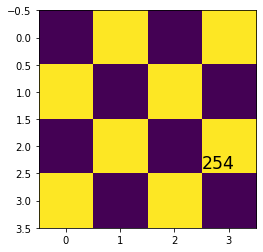

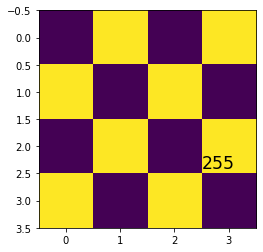

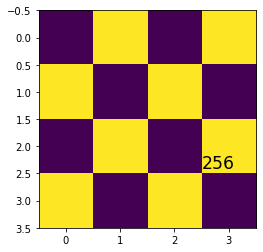

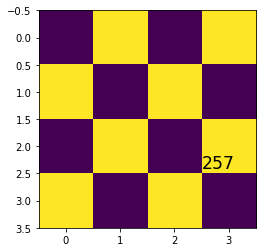

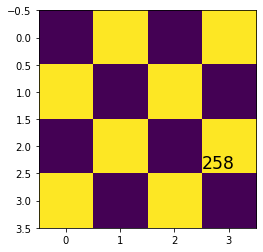

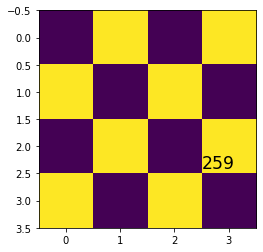

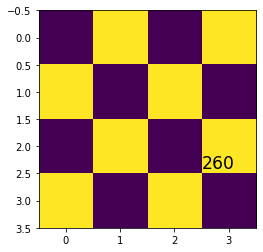

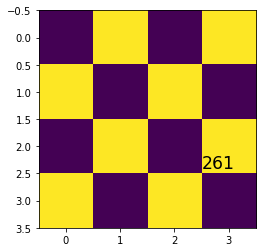

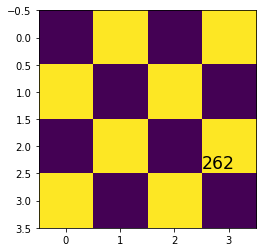

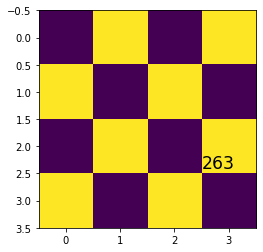

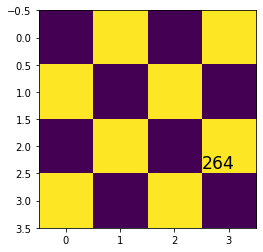

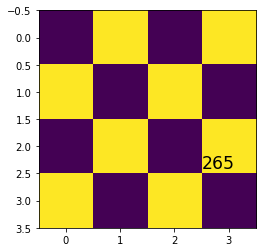

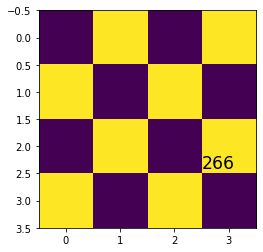

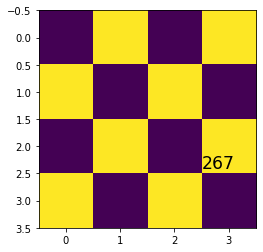

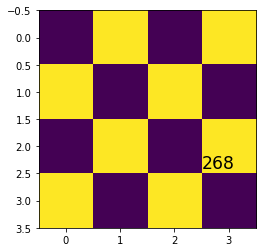

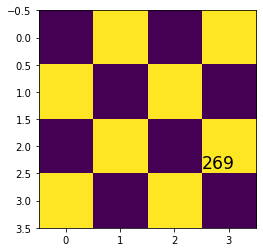

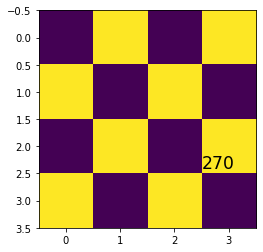

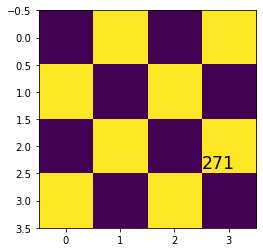

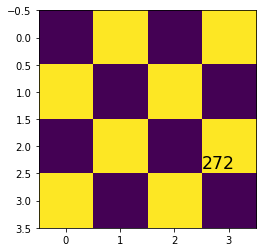

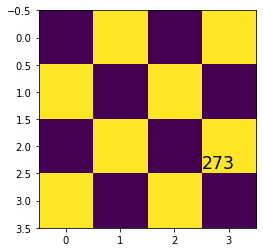

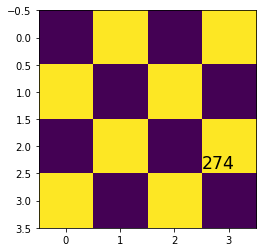

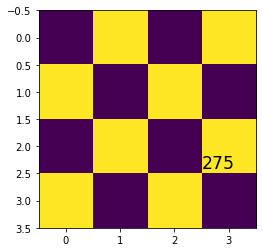

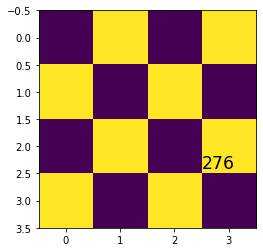

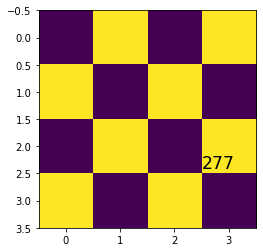

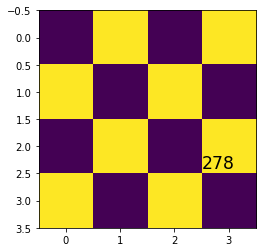

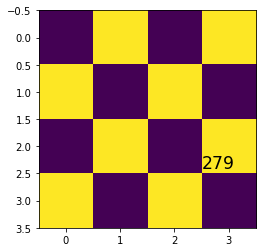

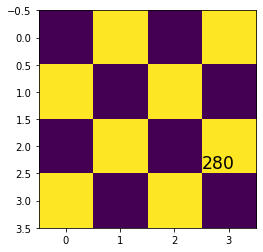

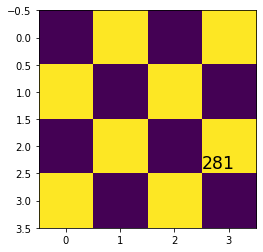

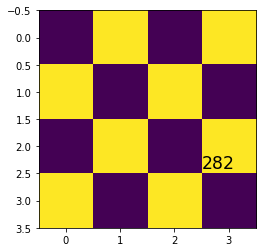

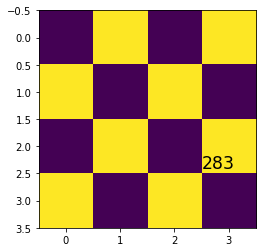

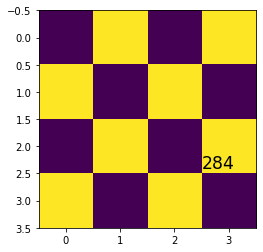

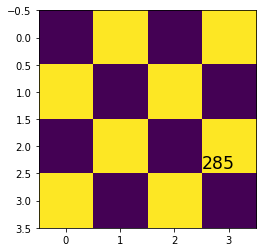

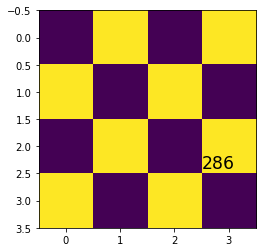

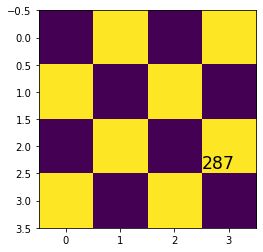

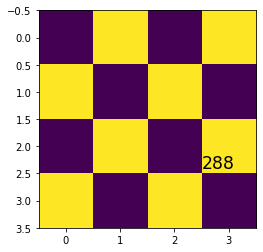

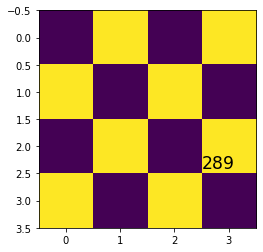

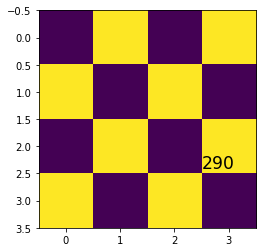

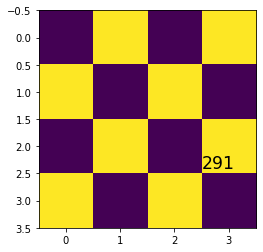

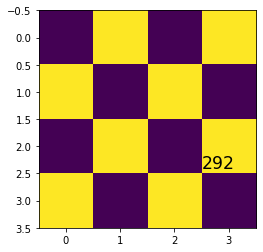

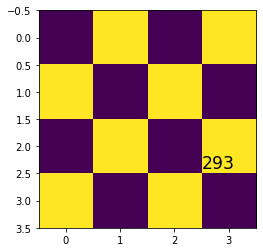

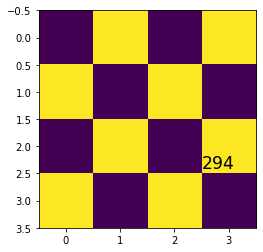

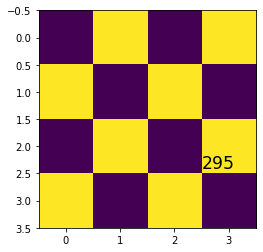

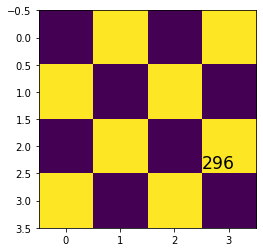

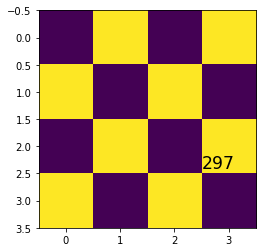

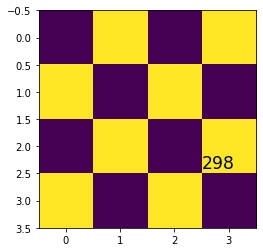

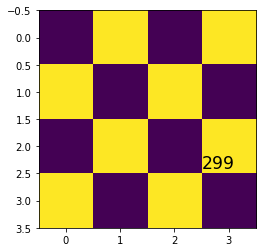

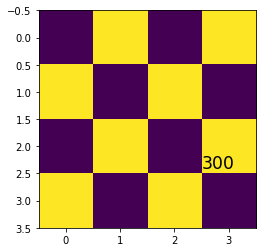

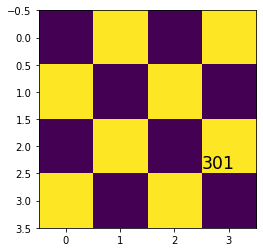

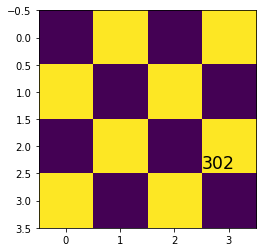

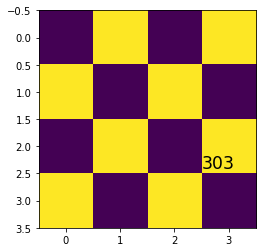

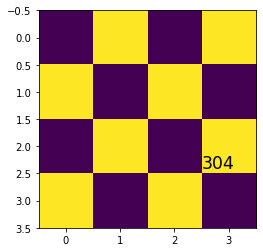

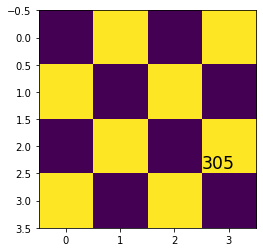

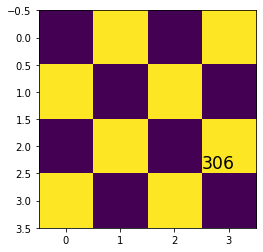

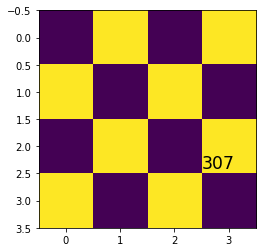

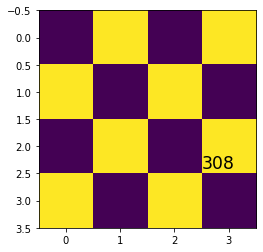

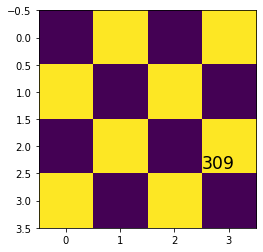

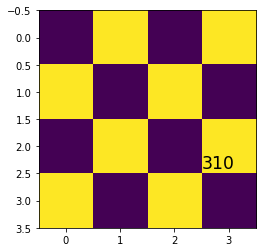

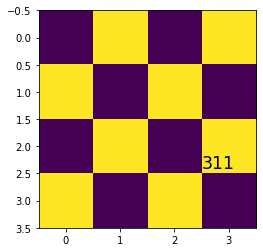

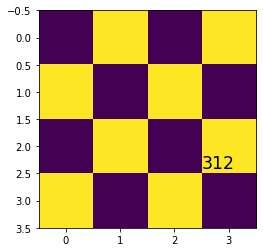

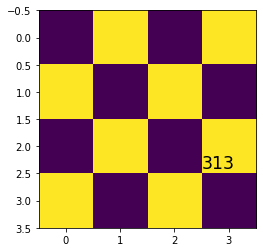

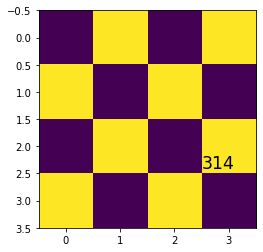

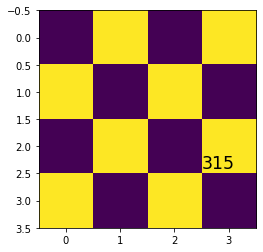

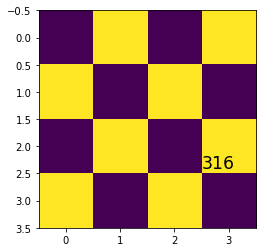

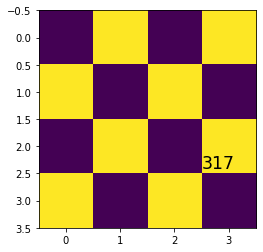

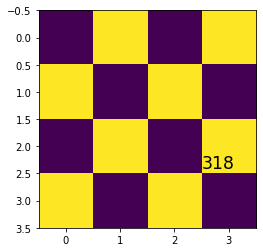

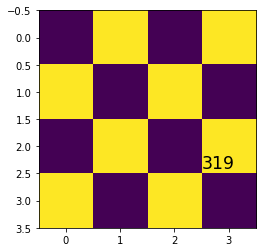

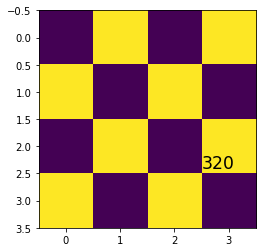

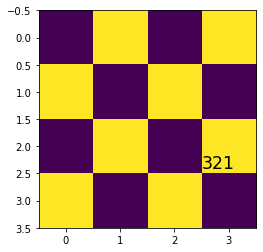

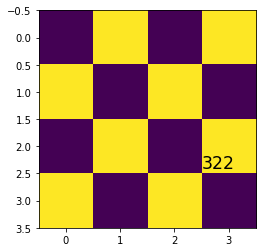

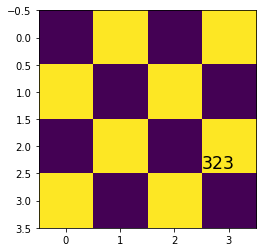

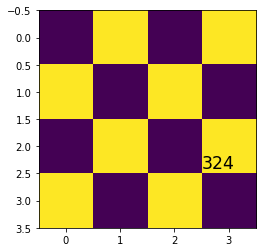

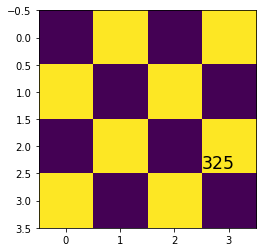

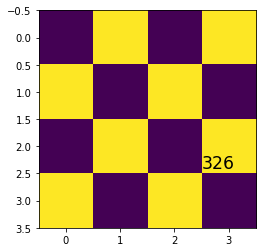

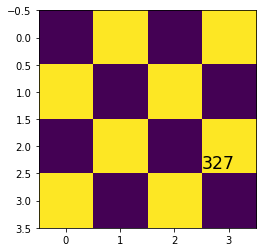

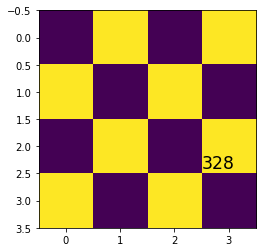

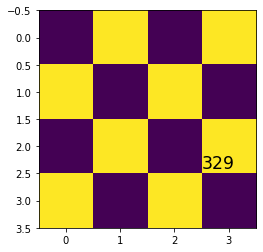

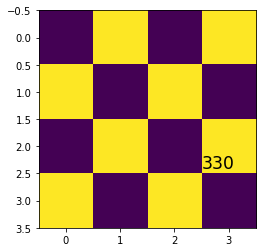

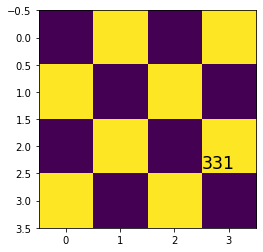

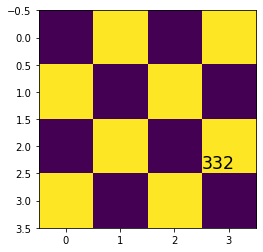

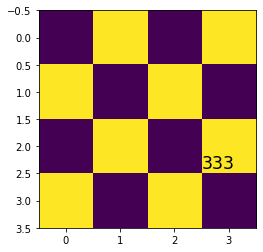

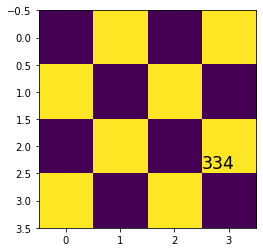

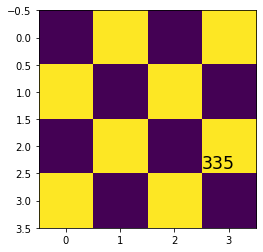

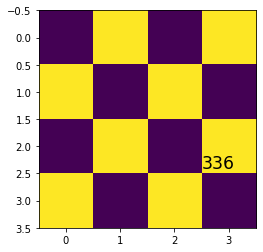

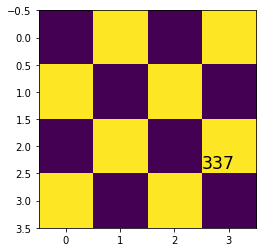

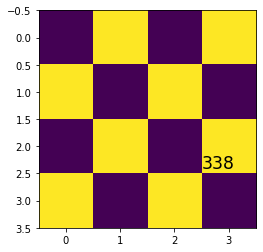

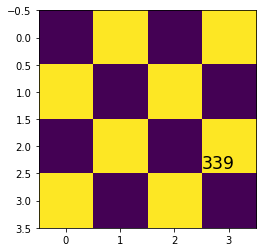

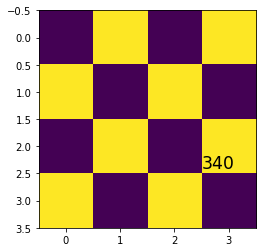

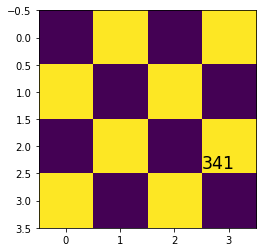

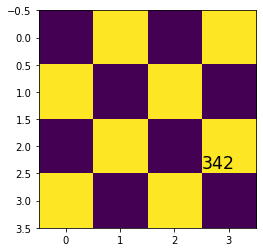

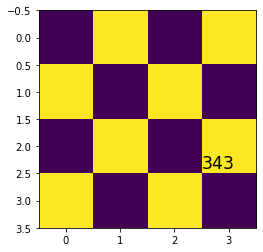

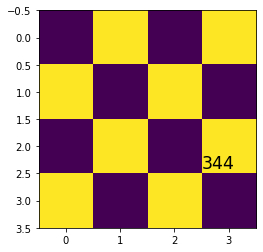

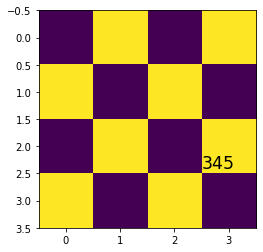

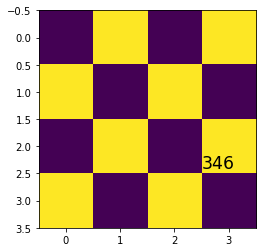

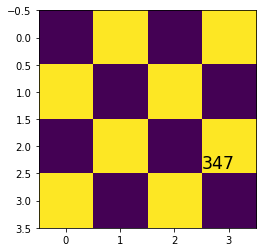

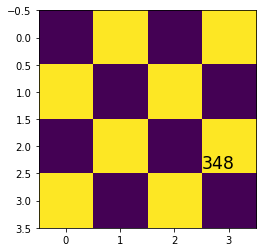

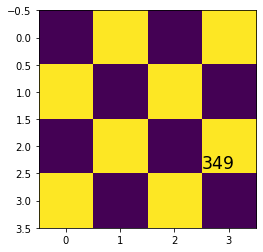

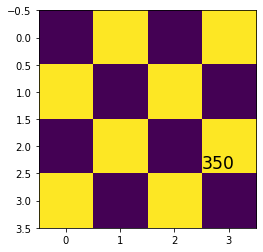

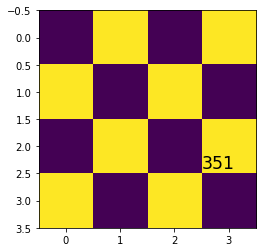

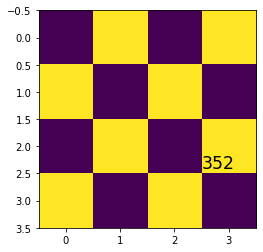

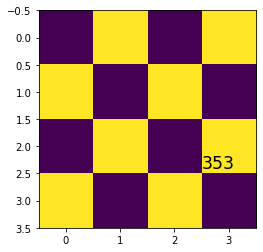

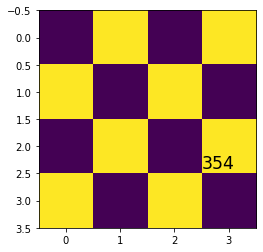

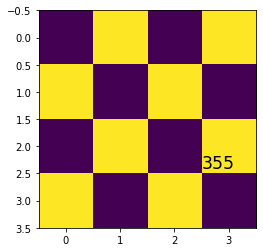

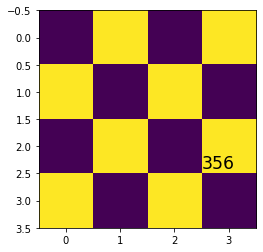

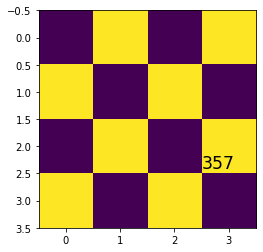

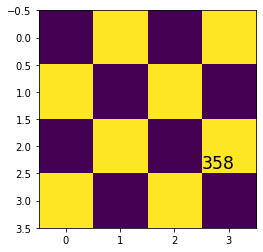

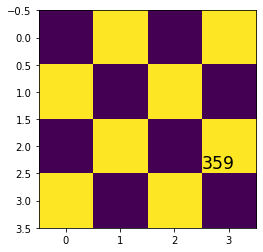

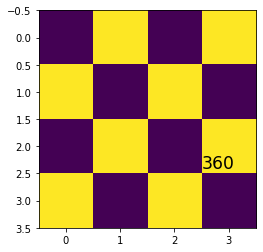

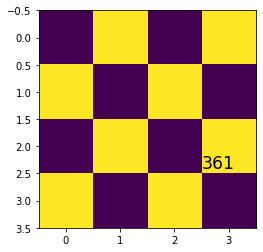

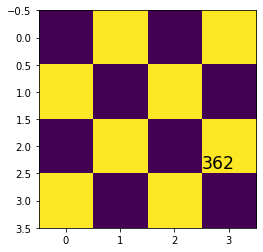

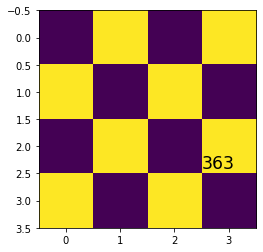

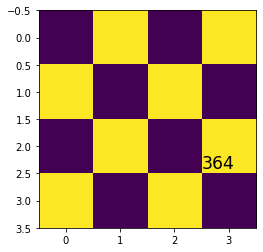

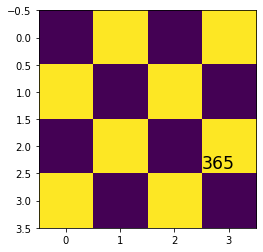

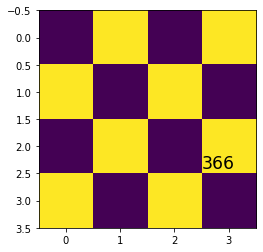

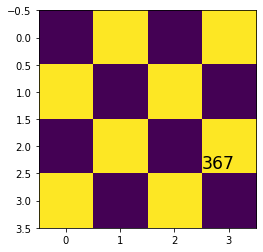

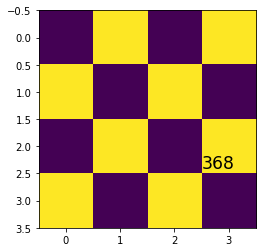

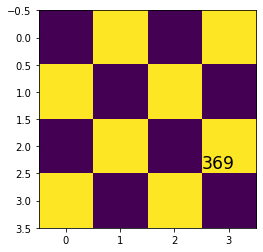

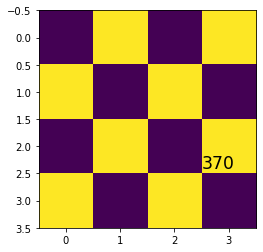

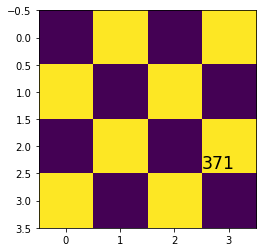

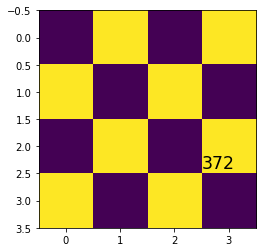

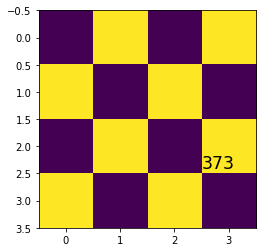

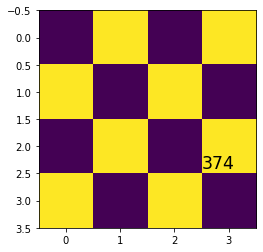

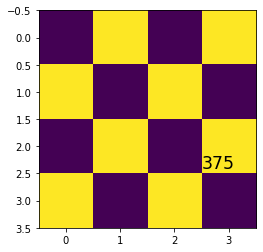

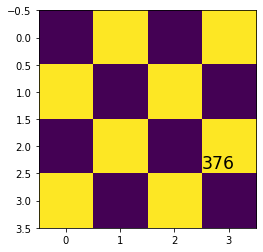

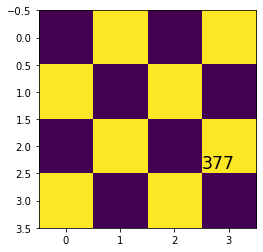

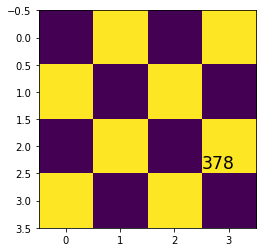

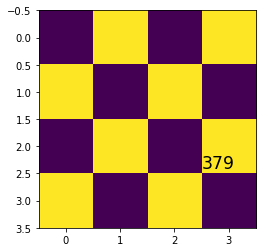

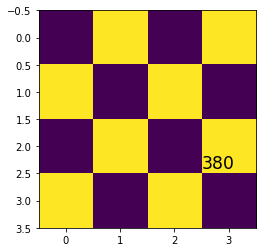

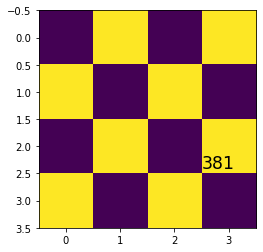

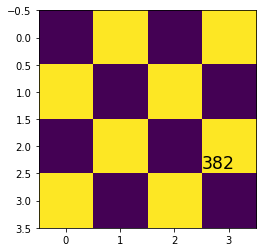

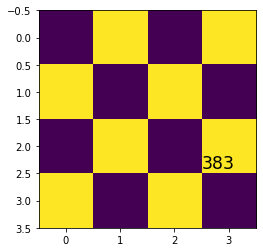

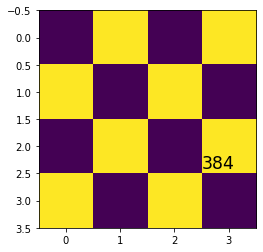

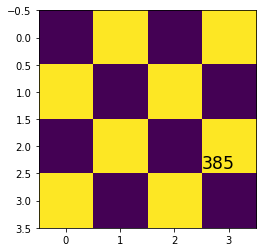

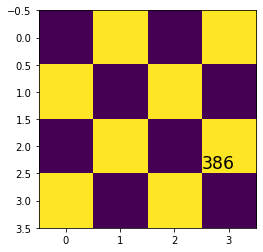

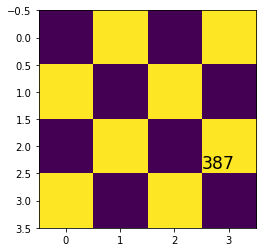

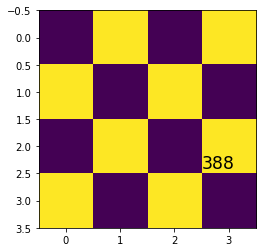

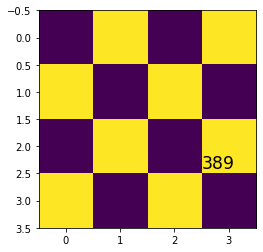

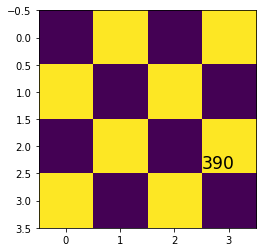

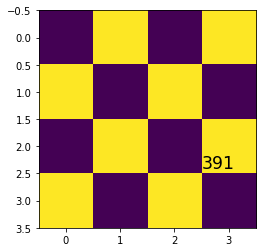

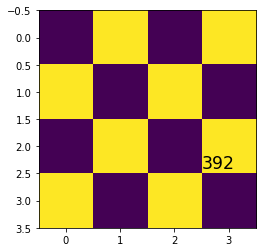

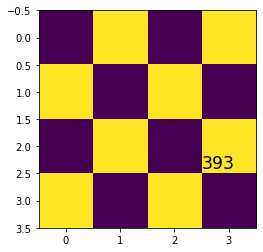

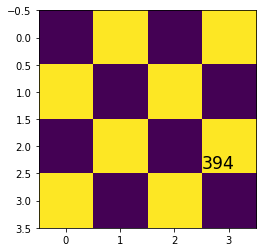

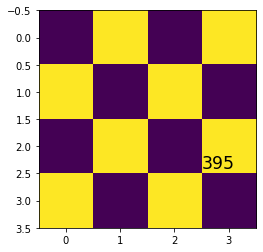

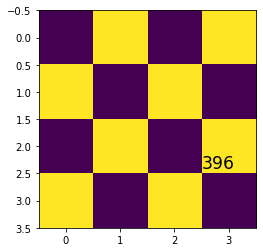

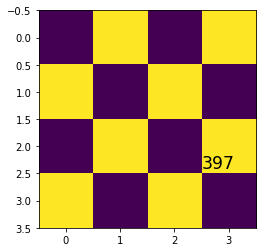

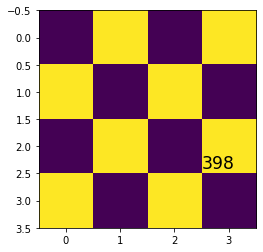

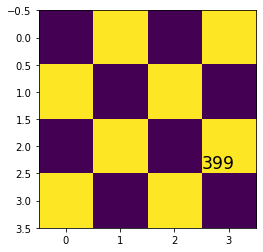

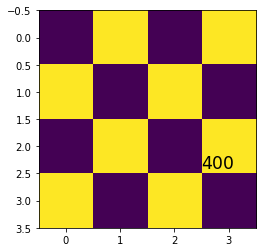

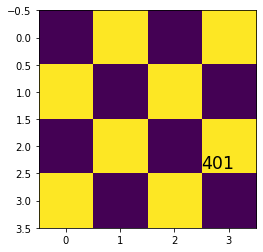

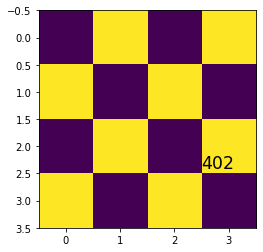

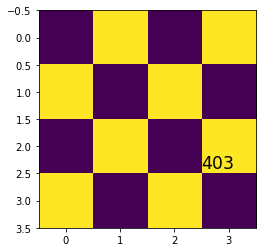

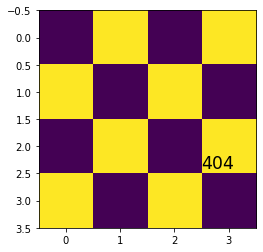

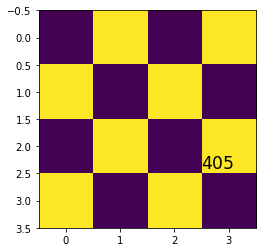

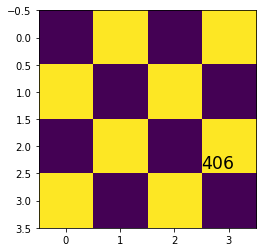

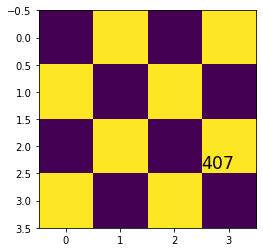

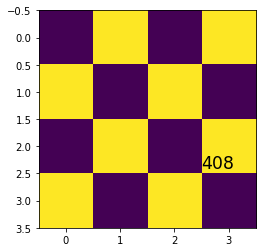

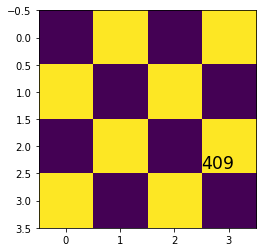

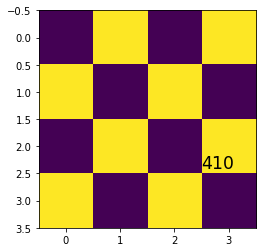

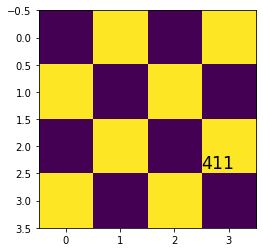

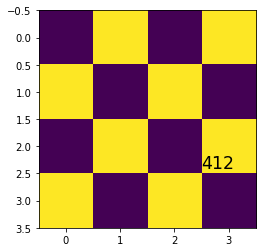

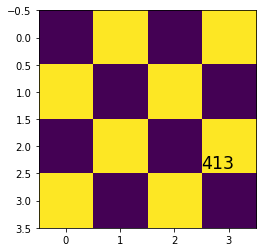

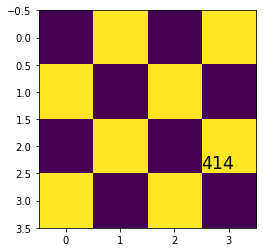

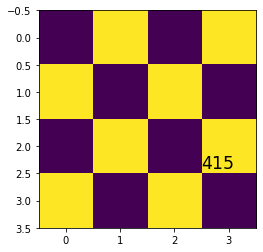

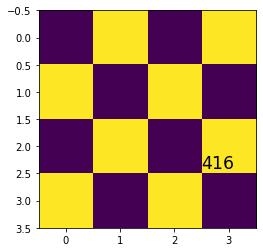

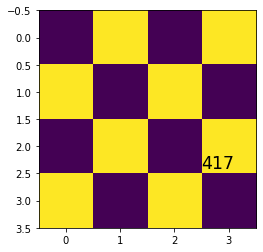

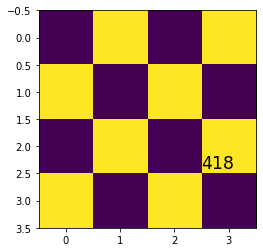

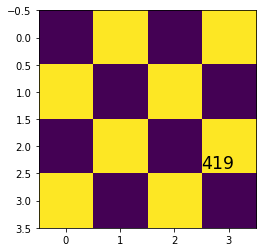

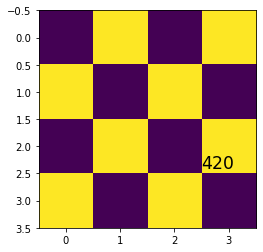

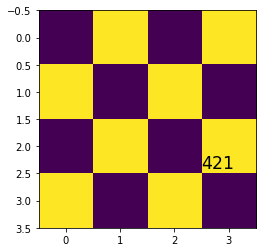

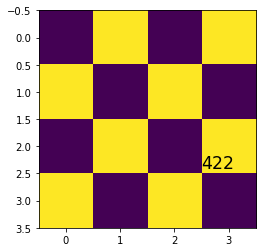

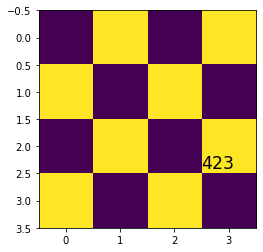

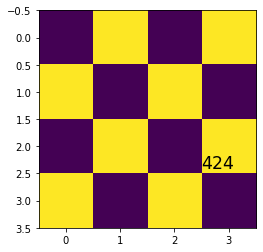

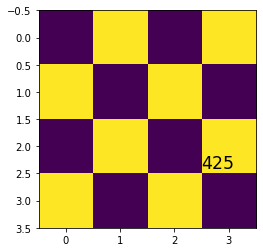

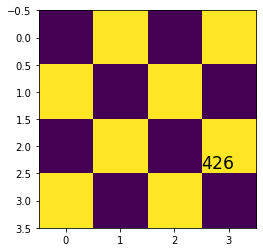

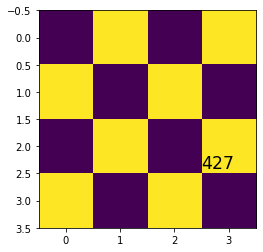

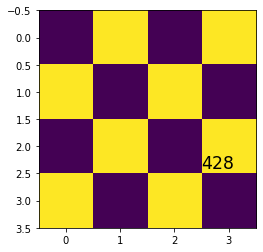

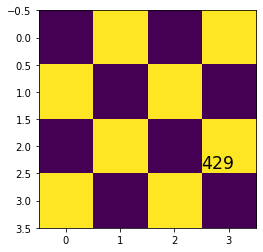

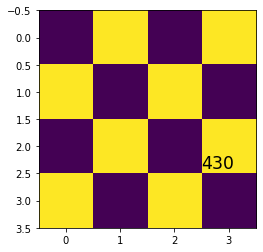

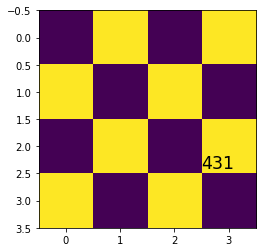

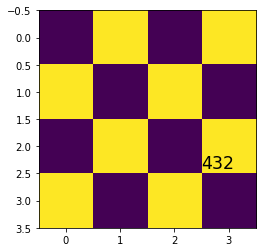

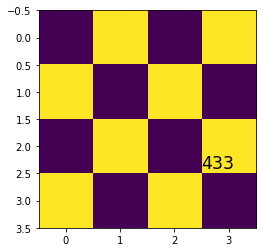

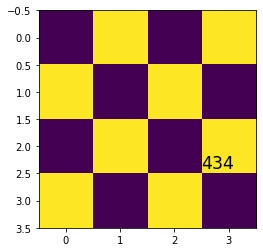

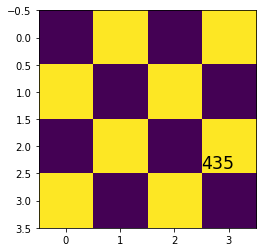

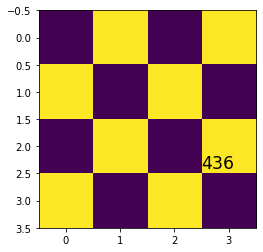

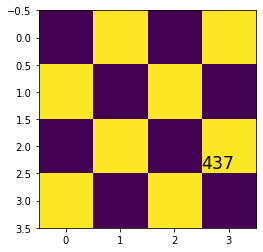

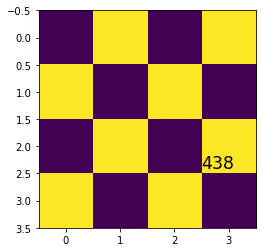

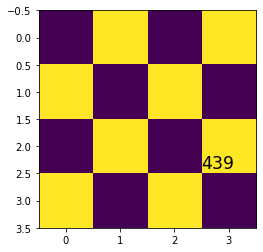

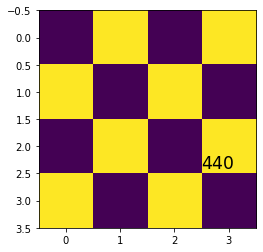

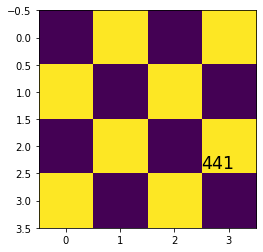

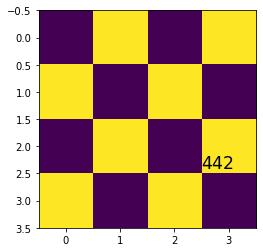

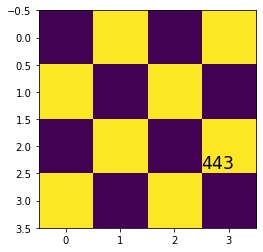

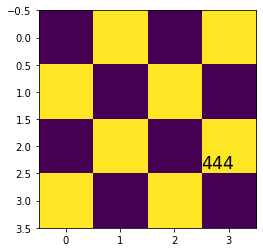

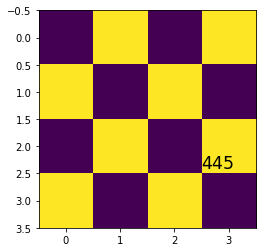

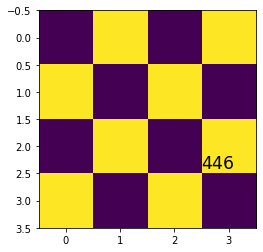

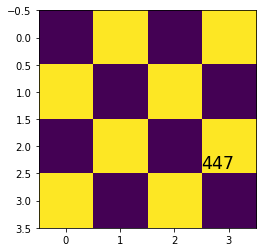

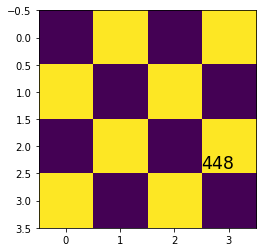

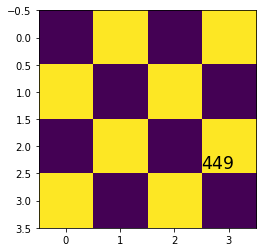

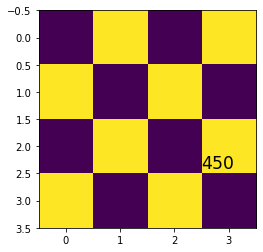

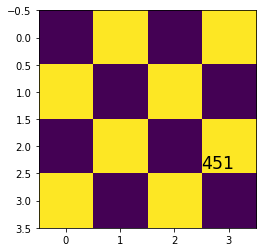

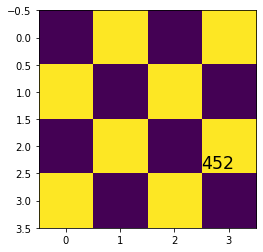

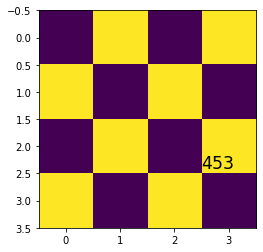

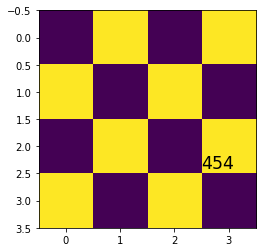

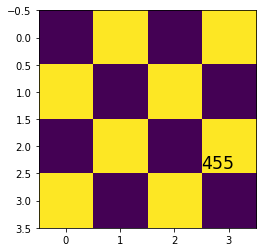

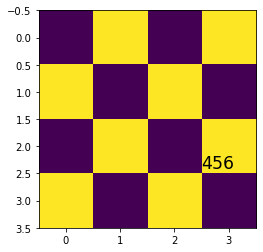

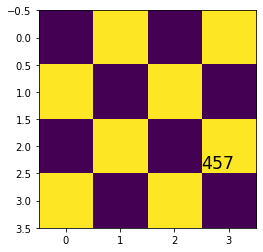

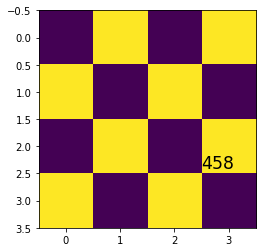

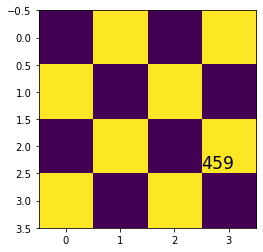

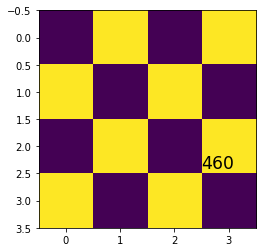

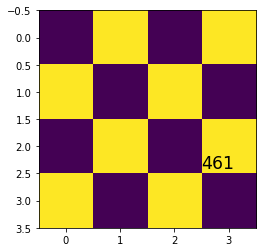

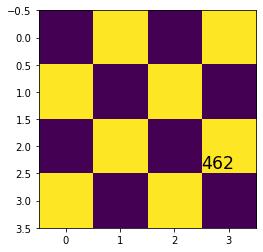

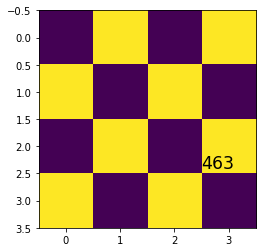

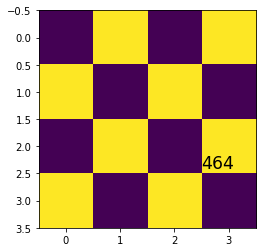

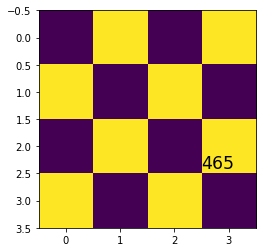

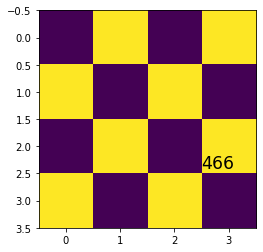

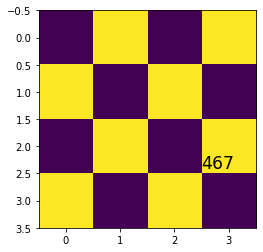

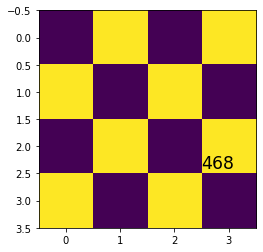

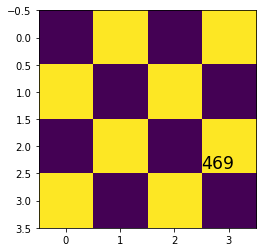

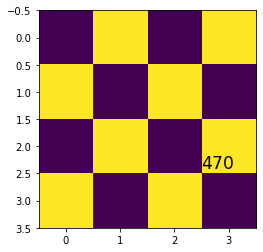

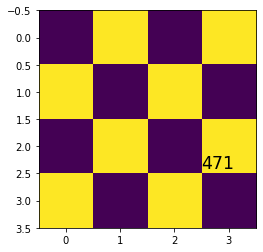

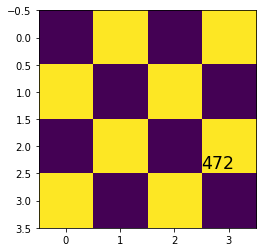

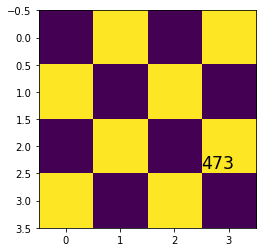

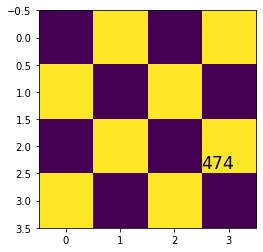

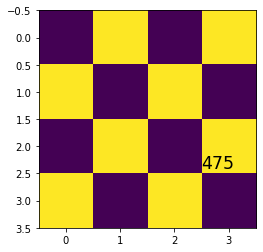

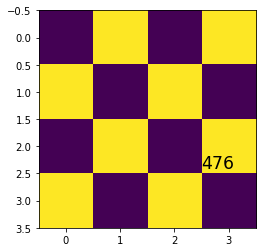

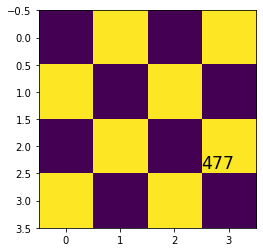

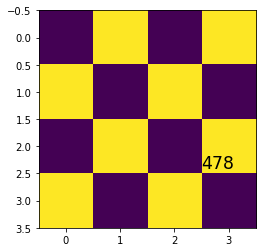

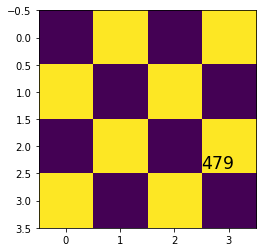

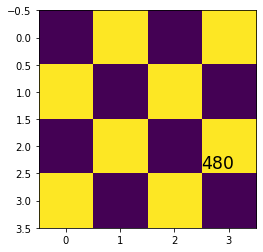

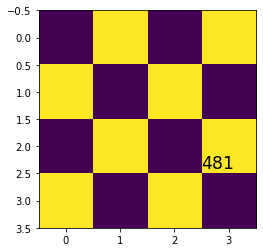

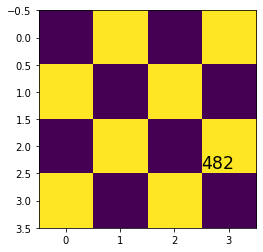

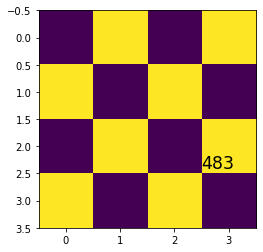

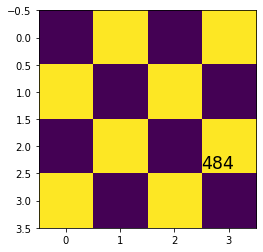

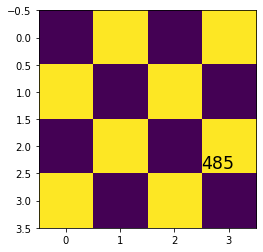

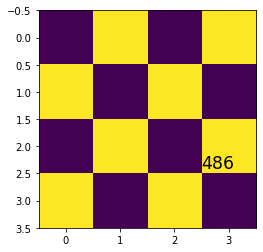

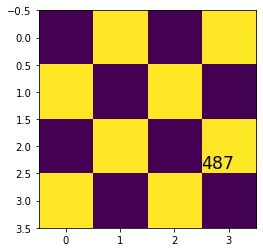

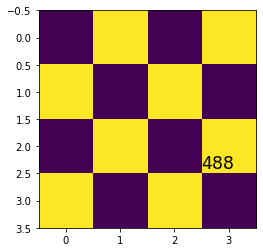

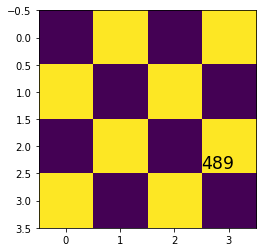

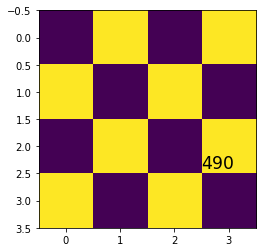

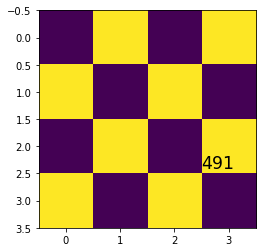

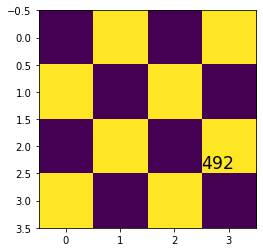

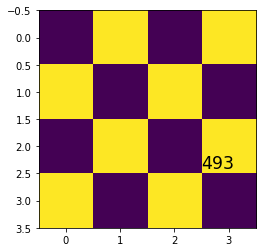

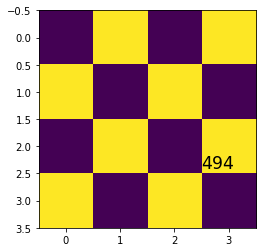

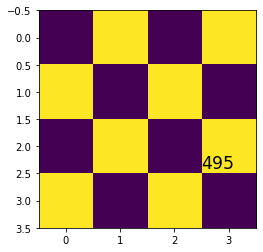

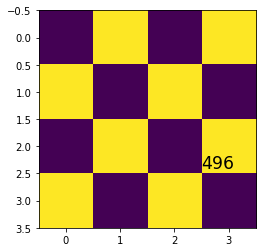

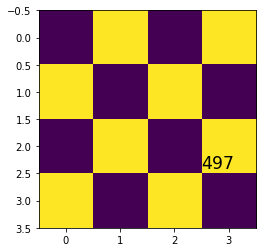

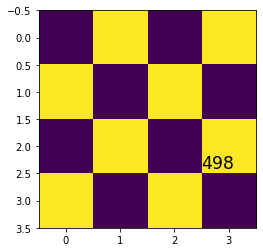

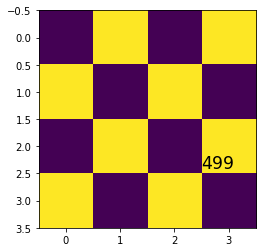

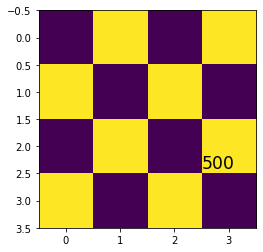

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


def matrix(num):
    #Генерация матрицы nxn с 1 и -1 (списки)

    data = np.ones((num, num), dtype=np.int32)

    for i in range(num):
        for j in range(num):
            data[i][j] = random.choice((1, -1))

    return data


def add_row(data):
    #Возвращает сумму попарных произведений всех, рядом стоящих элементов строк, квадратной матрицы.

    summa = 0

    num = len(data)
    for i in range(num):  # Пробегает по всем строкам

        # Концы строк, умножение на первый
        summa += data[i][num - 1] * data[i][0]

        # Не концы строк, вложенный цикл
        for j in range(num - 1):
            # Умножение на правый соседний
            summa += data[i][j] * data[i][j + 1]

    return summa


def add_neib(data):
    #Возвращает сумму попарных произведений всех, рядом стоящих элементов квадратной матрицы.
    return add_row(data) + add_row(data.T)


def rand_sign(data):
    #Умножение случайного элемента матрицы на -1.
    num = len(data)

    data_new = data.copy()
    i, j = random.randint(0, num - 1), random.randint(0, num - 1)
    data_new[i][j] = data_new[i][j] * (-1)
    return data_new


def rand_01():
    #Генерация случайного числа из интервала (0, 1).
    fl = random.random()
    while fl == 0:
        fl = random.random()

    return fl


n = int(input("Enter integer (>2): "))

arr = matrix(n)

print(arr)
E = add_neib(arr)

T = 0.8

plt.ion()

for i in range(501):

    plt.clf()

    plt.imshow(arr)
    plt.text(2.5, 2.4, str(i), fontsize='xx-large')
    plt.show()
    plt.pause(0.0000000000000001)

    arr_new = rand_sign(arr)  # шаг 2

    E_new = add_neib(arr_new)

    d_E = E_new - E  # шаг 3

    if d_E <= 0:  # шаг 4
        arr = arr_new.copy()
        E = E_new
        continue

    P = rand_01()  # шаг 5
    W = np.exp(-d_E / T)

    if P <= W:
        arr = arr_new.copy()
        E = E_new
        continue
    else:
        continue

plt.ioff()

plt.show()